Do một vài hạn chế trong PDF, Chúng em xin phép gửi link tài liệu (file ipynb trên nền tảng Google Colab) tại đây: https://colab.research.google.com/drive/1k_mPXfNIgq--XhDHDqJXKTjXXQtPwYBm?usp=sharing

<a id='0'></a>
# 1. Problem Definition

Trong đồ án này, ta sẽ tìm hiểu những thành phần quan trọng trong một mô hình học tăng cường: Policy - Agent - Enviroment - Reward - Action từ góc nhìn của việc giao dịch chứng khoán, đồng thời từ đó tạo ra một mô hình hoàn chỉnh có thể đưa ra các giao dịch mua bán dựa trên học tăng cường. Ta sẽ sử dụng Q - learning kết hợp với deep Q network để xử lý phần học tập và đưa ra các chiến thuật của mô hình nhầm có thể đưa ra các lựa chọn khôn ngoan hơn về sau. Đồng thời, ta sử dụng vnstock3 để lấy dữ liệu chứng khoán về và thực hiện các thao tác tiền xử lý để xem xét các đặt trưng của chúng.

<a id='2'></a>
# 2. Tải thư viện và Dữ liệu

<a id='2.1'></a>
## 2.1 Tải thư viện

Đầu tiên, ta cần tải và import những thư viện cần thiết.

In [ ]:
!pip install -U vnstock3
!pip install cufflinks
!pip install plotly
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vnstock3 import Vnstock # Nạp thư viện để sử dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
import cufflinks as cf
import plotly.io as pio
import plotly.graph_objects as go


    Khi tiếp tục sử dụng Vnstock3, bạn xác nhận rằng bạn đã đọc, hiểu và đồng ý với Chính sách quyền riêng tư và Điều khoản, điều kiện về giấy phép sử dụng Vnstock3.

    Chi tiết:

    - Giấy phép sử dụng phần mềm: https://vnstocks.com/docs/tai-lieu/giay-phep-su-dung
    - Chính sách quyền riêng tư: https://vnstocks.com/docs/tai-lieu/chinh-sach-quyen-rieng-tu
    


<a id='2.2'></a>
## 2.2 Tải dữ liệu

Ngành sữa Việt Nam luôn là một trong những ngành hàng tiêu dùng thiết yếu, thu hút sự quan tâm của đông đảo nhà đầu tư. Vì vậy trong báo cáo này, chúng ta sẽ đi sâu vào phân tích ba mã cổ phiếu tiêu biểu trong ngành. Ta bắt đầu lấy dữ liệu các cổ phiếu các công ty từ hàm Vnstock trong thư viện Vnstock, với:

CTCP Sữa Việt Nam - Vinamilk (Mã: VNM)

CTCP Đường Quảng Ngãi - Sữa Fami (Mã: QNS)

CTCP Giống Bò Sữa Mộc Châu (Mã: MCM)

**Lưu ý**: 3 doanh nghiệp trên được xếp vào các doanh nghiệp cùng ngành. Do đó cần chọn các doanh nghiệp cùng ngành để so sánh, đối chiếu với nhau.

Dữ liệu các giao dịch chứng khoán được lấy từ https://finance.vietstock.vn/ (source = 'VCI')
Mục tiêu của báo cáo là cung cấp cho nhà đầu tư cái nhìn chi tiết và toàn diện về hiệu suất, rủi ro và từ đó hỗ trợ quá trình ra quyết định đầu tư.

In [ ]:
stock_VNM = Vnstock().stock(symbol='VNM', source='VCI')
stock_QNS = Vnstock().stock(symbol='QNS', source='VCI')
stock_MCM = Vnstock().stock(symbol='MCM', source='VCI')

2025-01-20 06:18:46 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-20 06:18:49 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-20 06:18:51 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [ ]:
#Dữ liệu được lấy từ ngày 01-01-2019 đến 01-01-2025
df_VNM = stock_VNM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_QNS = stock_QNS.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_MCM = stock_MCM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')

Dữ liệu được sử dụng trong báo cáo này bao gồm giá cổ phiếu hàng ngày và khối lượng giao dịch của ba mã VNM, QNS và MCM, được thu thập từ ngày 01/01/2019 đến ngày 01/01/2025. Dữ liệu này được lấy từ nguồn tin cậy (VCI) và được xử lý để đảm bảo tính chính xác và khách quan.

In [ ]:
#Kiểm tra các biến đã đúng định dạng chưa? Có dữ liệu null không?
df_VNM.info()
df_QNS.info()
df_MCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1501 non-null   datetime64[ns]
 1   open    1501 non-null   float64       
 2   high    1501 non-null   float64       
 3   low     1501 non-null   float64       
 4   close   1501 non-null   float64       
 5   volume  1501 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 70.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1501 non-null   datetime64[ns]
 1   open    1501 non-null   float64       
 2   high    1501 non-null   float64       
 3   low     1501 non-null   float64       
 4   close   1501 non-null   float64       
 5   volume  1501 non-null   int64         
dtypes: dateti

**Nhận xét:** Qua kiểm tra, ta nhận thấy các biến của dữ liệu đã đúng định dạng cần thiết. Đồng thời, không chứa dữ liệu Null.

Tuy nhiên, dữ liệu của mã MCM chỉ có 1002 dòng, bị thiếu so với VNM và QNS (VNM, QNS có 1501 dòng). Điều này được giải thích vì đến ngày 28/12/2020, CTCP Giống bò sữa Mộc Châu mới bắt đầu khai trương giao dịch cổ phiếu.

In [ ]:
print(f"VNM: {df_VNM.shape}    MCM: {df_MCM.shape}    QNS: {df_QNS.shape}")

VNM: (1501, 6)    MCM: (1002, 6)    QNS: (1501, 6)


In [ ]:
#Đặt biến 'time' làm index để dễ dàng xử lý các phân tích về sau
df_MCM.set_index('time', inplace=True)
df_VNM.set_index('time', inplace=True)
df_QNS.set_index('time', inplace=True)

In [ ]:
#Tạo Data Frame mới chứa giá trị của 3 mã cổ phiếu nhằm thuận tiện cho việc vẽ biểu đồ bên dưới.
list_milks = ['VNM', 'QNS', 'MCM']
milk_stocks = pd.concat([df_VNM,df_QNS,df_MCM],
                        axis=1,
                        keys=list_milks)
milk_stocks.columns.names = ['Milk Name', 'Stock Info']

In [ ]:
milk_stocks

Milk Name     VNM                                  QNS                       \
Stock Info   open   high    low  close   volume   open   high    low  close   
time                                                                          
2019-01-02  77.47  79.07  77.15  79.07   403570  22.42  22.42  22.10  22.21   
2019-01-03  79.07  79.07  77.54  78.37   449730  22.21  22.26  22.10  22.26   
2019-01-04  78.11  79.70  77.15  79.70   498470  22.05  22.21  22.05  22.21   
2019-01-07  81.43  83.53  80.02  83.53   897430  22.10  22.26  21.78  21.94   
2019-01-08  83.79  83.79  82.06  82.89   448350  21.84  21.84  21.36  21.36   
...           ...    ...    ...    ...      ...    ...    ...    ...    ...   
2024-12-25  63.90  64.39  63.90  63.90  1304582  49.82  50.41  49.72  50.21   
2024-12-26  64.20  64.20  63.80  63.80  1711855  50.21  51.00  49.82  50.90   
2024-12-27  63.90  64.10  63.70  63.80  2445187  50.90  51.19  50.41  51.00   
2024-12-30  63.60  63.70  63.30  63.30  1492983  51.00  51.00  50.60  50.60   
2024-12-31  63.40  63.80  63.30  63.40  1643941  50.60  50.80  49.04  49.04   

Milk Name             MCM                                
Stock Info  volume   open   high   low  close    volume  
time                                                     
2019-01-02  314300    NaN    NaN   NaN    NaN       NaN  
2019-01-03  294697    NaN    NaN   NaN    NaN       NaN  
2019-01-04  119536    NaN    NaN   NaN    NaN       NaN  
2019-01-07  234880    NaN    NaN   NaN    NaN       NaN  
2019-01-08  582468    NaN    NaN   NaN    NaN       NaN  
...            ...    ...    ...   ...    ...       ...  
2024-12-25  260756  34.70  35.00  34.7  34.95   41300.0  
2024-12-26  455922  34.85  35.10  34.8  34.85   70700.0  
2024-12-27  390306  34.85  35.25  34.8  35.00  258600.0  
2024-12-30  256619  35.10  35.20  34.9  34.90   17200.0  
2024-12-31  558621  34.90  34.90  34.3  34.30   12300.0  

[1500 rows x 15 columns]

<a id='3'></a>
# 3. Khai phá dữ liệu

In [ ]:
#Mô tả dữ liệu của Vinamilk
df_VNM.describe()

open         high          low        close        volume
count  1500.000000  1500.000000  1500.000000  1500.000000  1.500000e+03
mean     73.124660    73.764953    72.479760    73.067627  2.337031e+06
std       8.645137     8.657447     8.578857     8.639060  1.689117e+06
min      55.370000    57.420000    55.370000    55.370000  2.717300e+05
25%      65.590000    66.087500    64.937500    65.520000  1.153175e+06
50%      71.715000    72.360000    70.990000    71.685000  2.033847e+06
75%      79.360000    79.870000    78.710000    79.270000  3.002215e+06
max      96.060000    97.300000    95.150000    96.670000  2.116741e+07

**Đồ thị đường (line chart) thể hiện giá đóng cửa của 3 mã chứng khoán.**

In [ ]:
cf.go_offline()
pio.renderers.default = 'colab'
milk_stocks.xs(key='close',axis=1,level='Stock Info').iplot(title='Giá đóng cửa ', xTitle='Năm', yTitle='Giá (K - VNĐ)')

/usr/local/lib/python3.11/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



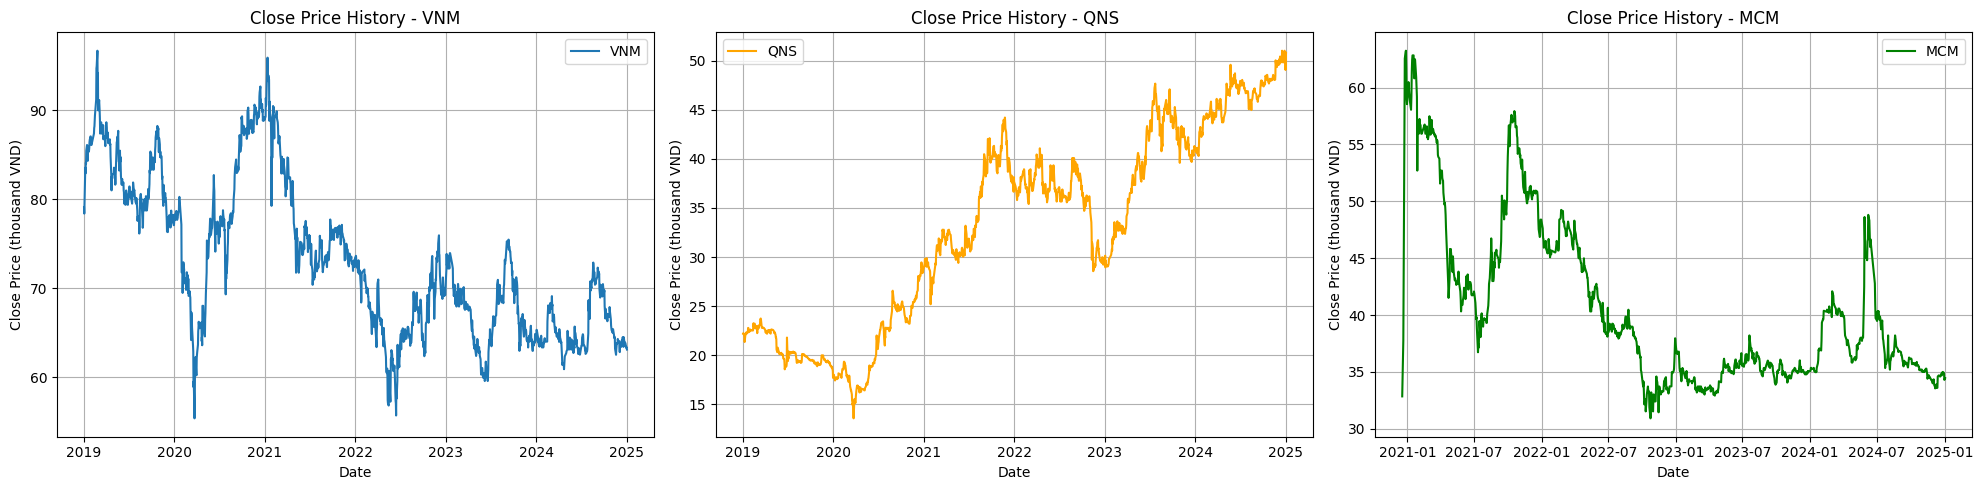

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['close'], label='VNM')
axs[0].set_title("Close Price History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price (thousand VND)')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['close'], label='QNS', color='orange')
axs[1].set_title("Close Price History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close Price (thousand VND)')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['close'], label='MCM', color='green')
axs[2].set_title("Close Price History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Close Price (thousand VND)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


**Nhận xét:**

VNM:
Giá cổ phiếu có xu hướng giảm dần từ khoảng năm 2019 đến giữa năm 2023.
Từ giữa năm 2023, giá cổ phiếu có sự phục hồi nhẹ nhưng vẫn không đạt lại mức đỉnh trước đó.
Thị trường có vẻ biến động mạnh hơn ở các giai đoạn đầu (2019–2021), sau đó trở nên ổn định hơn.

QNS:
Ngược lại với VNM, giá cổ phiếu QNS có xu hướng tăng trưởng bền vững, đặc biệt từ năm 2021 đến cuối năm 2024.
Xu hướng tăng khá ổn định, với ít biến động lớn.
Điều này có thể cho thấy công ty có kết quả kinh doanh hoặc triển vọng tích cực, thu hút nhà đầu tư.

MCM:
Giá cổ phiếu MCM có biến động mạnh, đặc biệt từ năm 2021 đến 2022, với những đợt tăng/giảm rõ rệt.
Sau năm 2022, giá cổ phiếu dường như bước vào giai đoạn giảm dần với một vài biến động nhỏ. Biến động này có thể liên quan đến quy mô công ty nhỏ hơn, thị phần hạn chế và sự phụ thuộc vào một số thị trường nhất định.

**Đồ thị đường (line chart) thể hiện khối lượng giao dịch của 3 mã chứng khoán.**

In [ ]:
milk_stocks.xs(key='volume',axis=1,level='Stock Info').iplot(title='Khối lượng giao dịch', xTitle='Năm', yTitle='Khối lượng giao dịch')

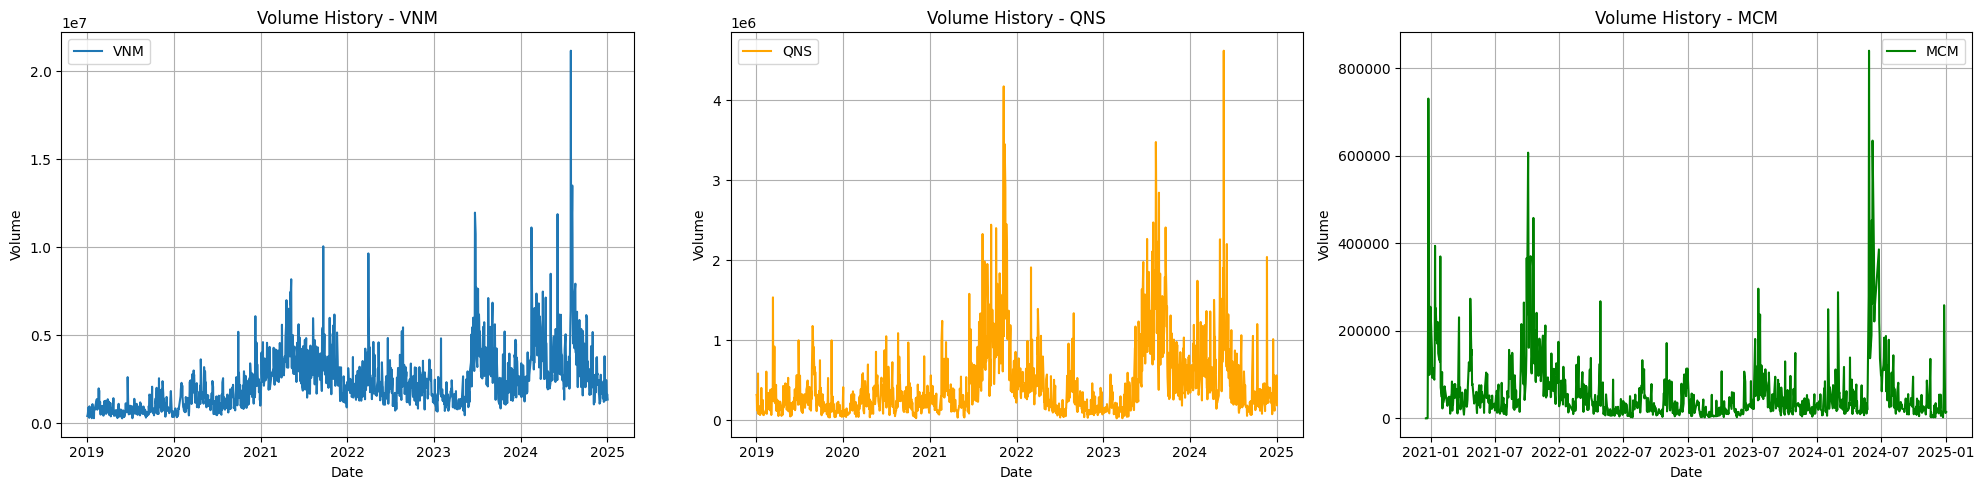

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['volume'], label='VNM')
axs[0].set_title("Volume History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['volume'], label='QNS', color='orange')
axs[1].set_title("Volume History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['volume'], label='MCM', color='green')
axs[2].set_title("Volume History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Volume')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


**Nhận xét:**

1. VNM (Biểu đồ bên trái):
Khối lượng giao dịch tăng dần từ năm 2019 đến giữa năm 2022, sau đó có xu hướng biến động mạnh hơn.
Đỉnh khối lượng giao dịch xuất hiện vào khoảng cuối năm 2022 và giữa năm 2024, cho thấy có sự quan tâm lớn từ nhà đầu tư trong các giai đoạn này.
Giai đoạn từ 2023 đến 2024 có sự gia tăng đáng kể về khối lượng giao dịch, có thể liên quan đến các sự kiện lớn như báo cáo tài chính, chia cổ tức, hoặc thay đổi chính sách.
2. QNS (Biểu đồ giữa):
Khối lượng giao dịch tương đối thấp từ 2019 đến 2021, cho thấy cổ phiếu này chưa thu hút được nhiều sự chú ý từ thị trường.
Từ năm 2022, khối lượng giao dịch tăng đáng kể, với các đỉnh lớn vào cuối năm 2021 và 2024.
Mức độ biến động của khối lượng giao dịch không lớn bằng VNM, nhưng có xu hướng tăng trưởng ổn định, có thể phản ánh sự cải thiện trong hiệu quả kinh doanh hoặc niềm tin của nhà đầu tư.
3. MCM (Biểu đồ bên phải):
Khối lượng giao dịch thấp và ổn định trong giai đoạn 2021–2023, có thể do thanh khoản kém hoặc ít sự quan tâm từ thị trường.
Tuy nhiên, từ giữa năm 2024, khối lượng giao dịch tăng đột biến, đạt đỉnh trong giai đoạn này. Điều này có thể do tin tức đặc biệt hoặc sự kiện lớn liên quan đến công ty.
Sau đỉnh này, khối lượng giao dịch giảm mạnh, quay trở lại mức thấp hơn.

**Ma trận biểu đồ phân tán (Scatter Plot Matrix) thể hiện mối quan hệ của giá đóng cửa giữa ba mã cổ phiếu VNM, QNS và MCM.**


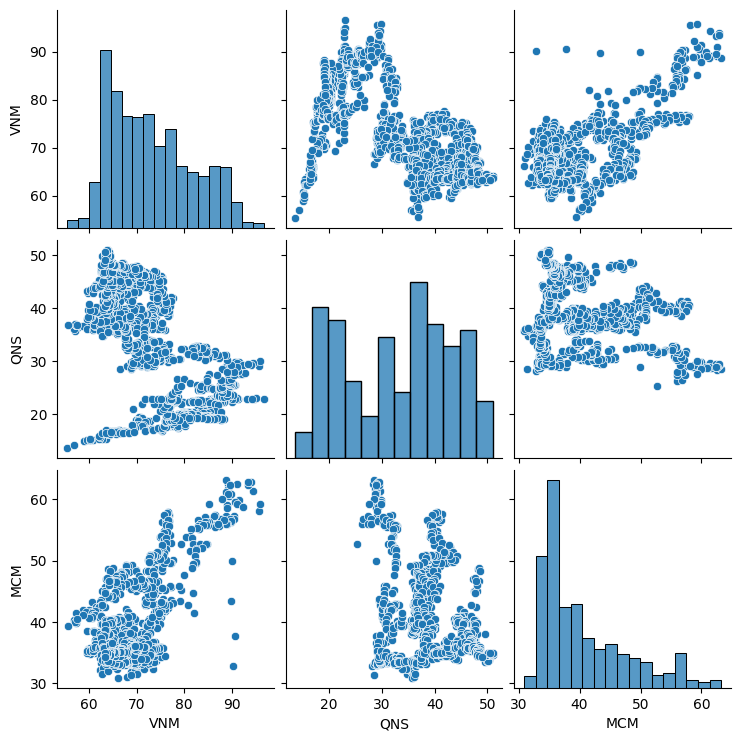

In [ ]:
# Đồ thị tương quan giá đóng cửa
close = pd.DataFrame()
close['VNM'] = df_VNM['close']
close['QNS'] = df_QNS['close']
close['MCM'] = df_MCM['close']
close.head()

# Vẽ pairplot
sns.pairplot(data=close)
# Hiển thị đồ thị
plt.show()

1. Biểu đồ Histogram (đường chéo chính):

 - VNM: Phân phối lệch trái (left-skewed), tập trung nhiều ở khoảng giá trị cao (từ 70 đến 90). Điều này cho thấy giá cổ phiếu VNM có xu hướng duy trì ở mức cao trong giai đoạn được xem xét.

 - QNS: Phân phối tương đối đều (relatively uniform), trải dài từ khoảng 20 đến 50. Giá cổ phiếu QNS có vẻ biến động trong một khoảng rộng hơn so với VNM.

 - MCM: Phân phối lệch phải (right-skewed), tập trung nhiều ở khoảng giá trị thấp (từ 30 đến 45). Giá cổ phiếu MCM có xu hướng duy trì ở mức thấp hơn so với VNM và QNS.
2. Biểu đồ phân tán (ngoài đường chéo chính):

 - VNM và QNS: Có mối tương quan thuận (positive correlation) nhưng không quá mạnh. Khi giá VNM tăng, giá QNS có xu hướng tăng theo, và ngược lại. Tuy nhiên, mối tương quan này không tuyến tính hoàn toàn.

 - VNM và MCM: Cũng có mối tương quan thuận nhưng yếu hơn so với VNM và QNS. Khi giá VNM tăng, giá MCM cũng có xu hướng tăng, nhưng mối liên hệ này không rõ ràng.

 - QNS và MCM: Tương quan thuận, rõ ràng hơn so với hai cặp còn lại, nhưng vẫn không phải là mối tương quan tuyến tính mạnh mẽ. Khi giá QNS tăng thì giá MCM có xu hướng tăng.

<Axes: xlabel='Milk Name', ylabel='Milk Name'>

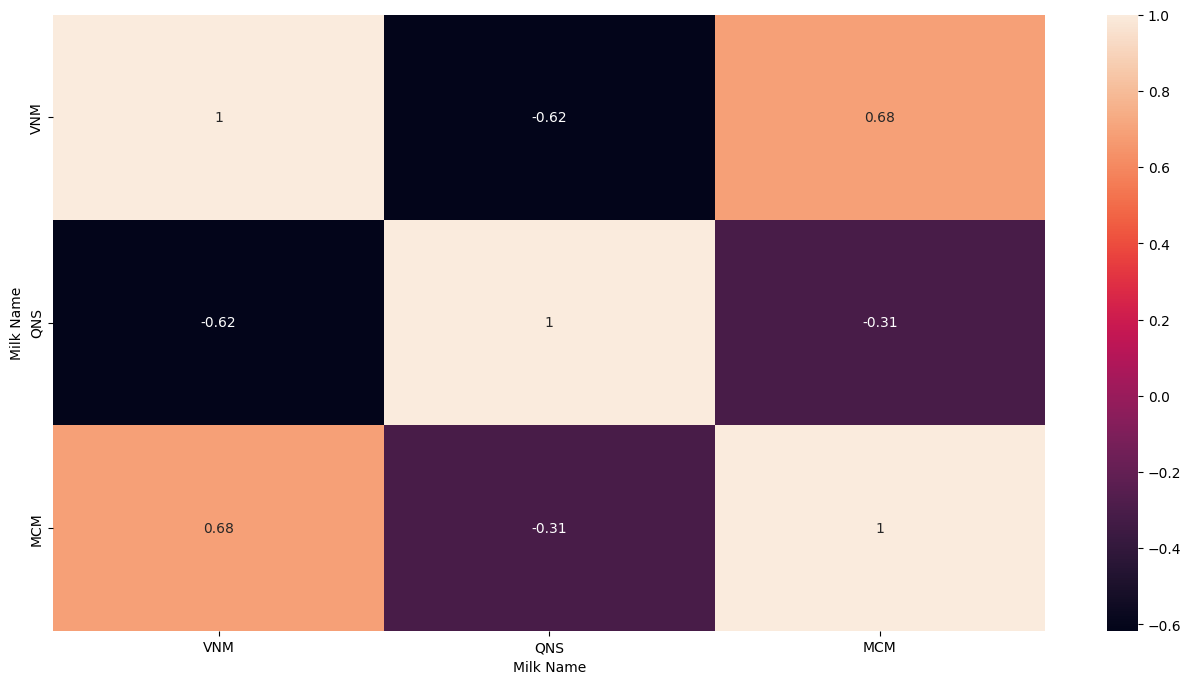

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(milk_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True)

1. Giá trị tương quan:

 - VNM và QNS: Hệ số tương quan là -0.62. Đây là mối tương quan nghịch biến mạnh. Khi giá đóng cửa của VNM tăng thì giá đóng cửa của QNS có xu hướng giảm, và ngược lại.

 - VNM và MCM: Hệ số tương quan là 0.21. Đây là mối tương quan thuận yếu. Khi giá đóng cửa của VNM tăng thì giá đóng cửa của MCM có xu hướng tăng theo, nhưng mối liên hệ này không rõ ràng và khá lỏng lẻo.

 - QNS và MCM: Hệ số tương quan là -0.59. Đây là mối tương quan nghịch biến tương đối mạnh. Khi giá đóng cửa của QNS tăng thì giá đóng cửa của MCM có xu hướng giảm, và ngược lại.

2. Màu sắc:

 - Màu càng đậm (hồng đậm/đen) thể hiện độ lớn của hệ số tương quan càng cao (bỏ qua dấu).

 - Màu hồng thể hiện tương quan thuận (giá trị dương).

 - Màu đen thể hiện tương quan nghịch (giá trị âm).

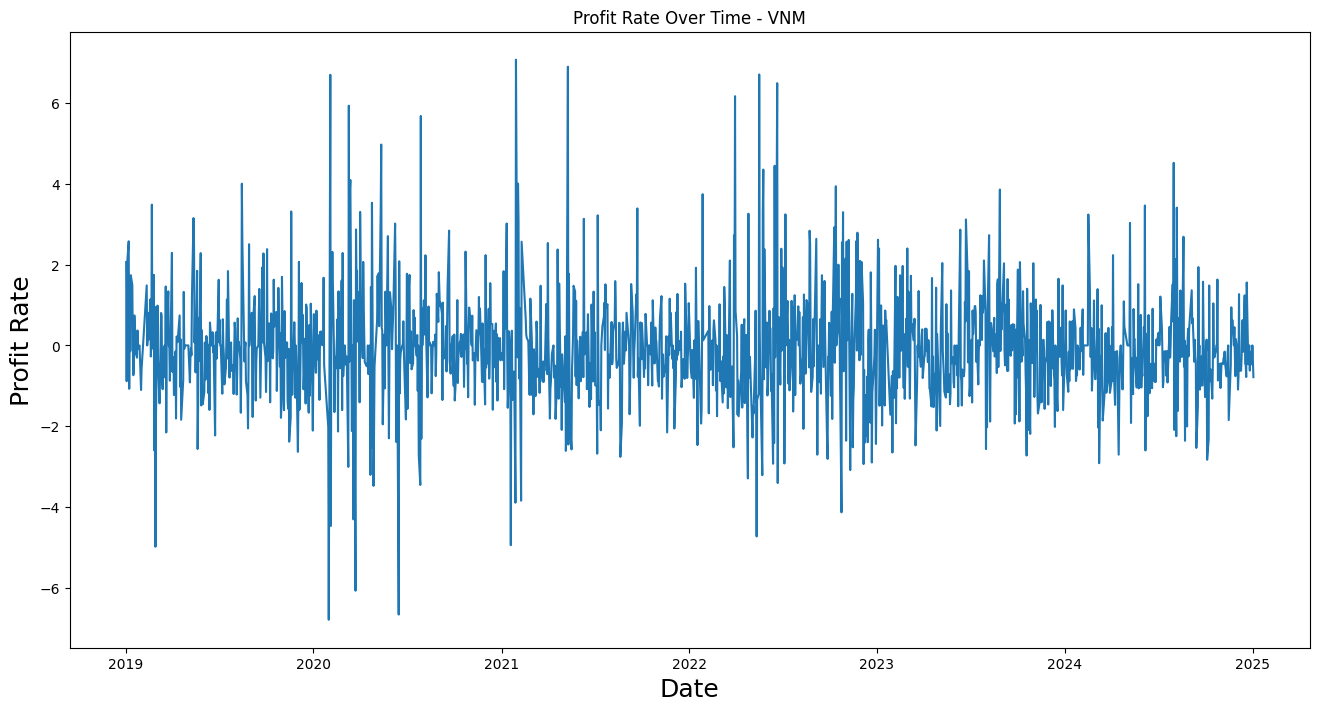

In [ ]:
#Tinh ti suat loi nhuan ((close-open)/open)*100
df_VNM['profit rate'] = ((df_VNM['close']-df_VNM['open'])/df_VNM['open'])*100
#Visualize
plt.figure(figsize=(16,8))
plt.title("Profit Rate Over Time - VNM")
plt.plot(df_VNM['profit rate'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Profit Rate', fontsize=18)
plt.show()

Nhận xét:

Biến động mạnh: Tỷ suất lợi nhuận của VNM có biến động rất mạnh trong suốt giai đoạn 2019-2025. Có rất nhiều đỉnh (peaks) và đáy (troughs) với biên độ lớn.

Xu hướng:

 - 2019 - đầu 2020: Có xu hướng giảm nhẹ
 - Giữa 2020 - giữa 2021: Có một số đợt biến động rất lớn, giá trị tuyệt đối của tỷ suất lợi nhuận lên đến 6-7, đây là khoảng thời gian biến động mạnh nhất
 - Giữa 2021 - cuối 2024: Xu hướng đi ngang là chủ yếu, tuy nhiên vẫn dao động rất lớn
 - Cuối 2024 - đầu 2025: Có xu hướng đi ngang
Tính chu kỳ: Mặc dù biến động rất mạnh, có thể quan sát thấy một số tính chu kỳ ngắn hạn, với các đỉnh và đáy xuất hiện tương đối thường xuyên. Tuy nhiên, chu kỳ này không đều đặn và khó dự đoán chính xác.

Giá trị trung bình: Giá trị trung bình của tỷ suất lợi nhuận dường như nằm quanh mức 0, cho thấy VNM có khả năng duy trì lợi nhuận ở mức ổn định trong dài hạn, nhưng có những biến động lớn trong ngắn hạn.

<a id='3.1'></a>
## 3.1 'Moving Average - MA'

Moving Average (MA) là một chỉ báo được sử dụng rộng rãi trong phân tích kỹ thuật, giúp làm mịn biến động giá bằng cách lọc ra "nhiễu" từ các dao động giá ngẫu nhiên. Nó là một **chỉ báo xu hướng** hoặc **chỉ báo trễ**, vì nó dựa trên giá trong quá khứ.


Đường trung bình:
Ngắn hạn: MA10
Trung hạn: MA50
Dài hạn: MA200

In [ ]:
# Let's go ahead and plot out several moving averages
ma_day = [10,50,200]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df_VNM[column_name]=pd.DataFrame.rolling(df_VNM['close'],ma).mean()

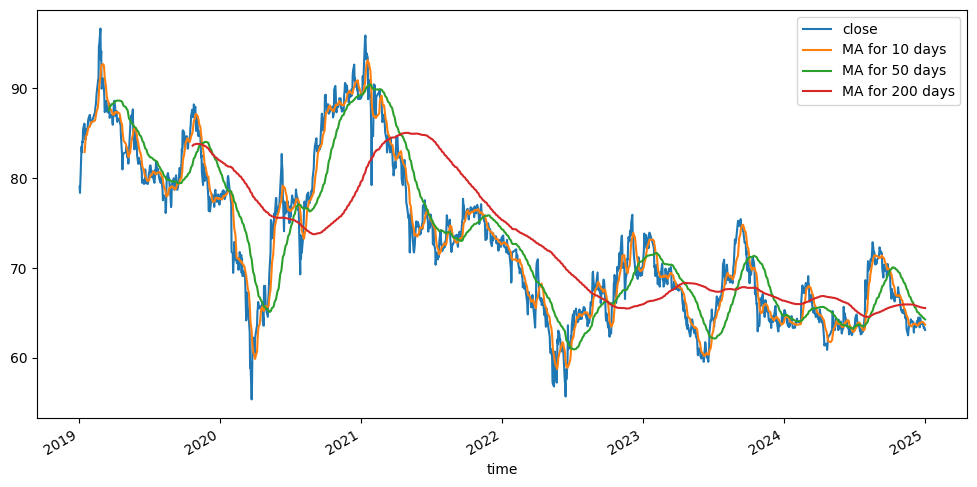

In [ ]:
df_VNM[['close','MA for 10 days','MA for 50 days','MA for 200 days']].plot(subplots=False,figsize=(12,6))
plt.show()

Xu hướng:

 - 2019 - đầu 2020: Giá cổ phiếu có xu hướng giảm, thể hiện qua việc đường MA 10, MA 50 và MA 200 đều dốc xuống. Giá đóng cửa chủ yếu nằm dưới các đường MA.

 - Giữa 2020 - giữa 2021: Giá cổ phiếu phục hồi mạnh mẽ, tạo đỉnh vào khoảng giữa năm 2021. Đường MA 10 và MA 50 cắt lên trên MA 200 (Golden Cross) vào khoảng giữa năm 2020, báo hiệu xu hướng tăng.

 - Giữa 2021 - đầu 2022: Giá cổ phiếu bước vào giai đoạn điều chỉnh mạnh, giảm sâu. Đường MA 50 cắt xuống dưới MA 200 (Death Cross) vào khoảng cuối năm 2021, xác nhận xu hướng giảm.

 - 2022 - đầu 2025: Giá cổ phiếu đi ngang (sideways) trong biên độ rộng, không có xu hướng rõ ràng. MA 50 và MA 200 gần như đi ngang và quấn lấy nhau, báo hiệu sự giằng co giữa bên mua và bên bán. Cuối năm 2024, MA 50 có dấu hiệu cắt lên MA200.

Biến động giá:

 - Giá cổ phiếu biến động mạnh trong suốt giai đoạn từ 2019 đến 2025.

 - Giai đoạn 2020-2021 chứng kiến sự tăng trưởng mạnh, sau đó là đợt điều chỉnh sâu vào năm 2022.

 - Từ 2023 đến đầu 2025, giá cổ phiếu chủ yếu đi ngang.

Đường trung bình động (MA) là một công cụ kỹ thuật hữu ích giúp nhà đầu tư nhận biết xu hướng giá của cổ phiếu. Trong trường hợp của VNM, đường MA cho thấy xu hướng giảm dần từ năm 2019 đến giữa năm 2023, sau đó đi ngang và chưa có dấu hiệu phục hồi rõ ràng.

<a id='3.2'></a>
## 3.2 Biểu Đồ Nến

Biểu đồ nến (candlestick chart) là một công cụ phân tích kỹ thuật phổ biến trong việc đánh giá và dự báo xu hướng giá của cổ phiếu. Biểu đồ này cung cấp thông tin chi tiết về hành vi giá của cổ phiếu trong một khoảng thời gian nhất định, giúp các nhà đầu tư và phân tích viên hiểu rõ hơn về tình hình thị trường.

Đối với cổ phiếu VNM (Vinamilk) dưới đây, biểu đồ nến sẽ thể hiện các thông tin chính sau:

 - Mỗi cây nến đại diện cho một khoảng thời gian: Tùy theo cài đặt của người sử dụng, mỗi cây nến có thể đại diện cho một phút, một giờ, một ngày, một tuần, hay một tháng. Cây nến sẽ cho biết giá mở cửa (open), giá đóng cửa (close), giá cao nhất (high) và giá thấp nhất (low) trong khoảng thời gian đó.

 - Thân nến (Body): Phần thân của nến cho biết sự chênh lệch giữa giá mở cửa và giá đóng cửa.

  - Nếu giá đóng cửa cao hơn giá mở cửa (nến màu xanh hoặc trắng), điều này cho thấy xu hướng tăng.
  - Nếu giá đóng cửa thấp hơn giá mở cửa (nến màu đỏ hoặc đen), điều này cho thấy xu hướng giảm.
  
- Bóng nến (Wick): Phần bóng nến cho biết mức giá cao nhất và thấp nhất trong khoảng thời gian đó, phản ánh biến động của thị trường.

In [ ]:
# Hàm vẽ biểu đồ nến
def plot_candlestick(df, ticker):
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        name=ticker
    )])

    fig.update_layout(
        title=f'Biểu đồ nến cho {ticker}',
        xaxis_title='Ngày',
        yaxis_title='Giá',
        xaxis_rangeslider_visible=False
    )

    fig.show()

# Vẽ biểu đồ nến cho từng mã
plot_candlestick(df_VNM, 'VNM')

<a id='4.'></a>
# 4. Mô hình

<a id='4.1'></a>
## 4.1. Train Test Split

Ta sẽ chia dữ liệu ra làm hai hồi, hồi đầu là dùng để huần luyện (chiếm gần hơn nữa tổng số dữ liệu), và hồi sau, là dùng để đánh giá mô hình, tuy nhiên, ta sẽ muốn đánh giá mô hình dựa trên nhiều hình dạng của thị trường để có thể đánh giá một cách tông quát nhất có thể. Ta chia dữ liệu đánh giá phía sau ra làm nhiều hồi chồng lên nhau, mỗi hồi cách nhau 10 ngày, với cách chia dữ liệu này, ta có thể thấy được tính độc lập của chúng thông qua cách mà mô hình hoạt động khi dữ liệu càng xa với dữ luyện được huấn luyện

In [ ]:
X=list(df_VNM["close"])
X=[float(x) for x in X]

In [ ]:
X_train = X[0:600]
X_test = []

for i in range(30):
  X_test.append(X[600+10*i: 1200 +10*i ])



<a id='4.2'></a>
## 4.2. Triển khai mô hình và môi trường

Ta quan tâm đến việc tạo ra một thực thể mà tại đó nó có quyền thực hiện các thao tác mua, bán hoặc giữ cổ phiếu vào mỗi ngày, và mục tiêu cuối cùng là tối đa hóa lợi nhuận mà nó thu được.

Một cách tiếp cận đơn giản là ta sẽ cho thực thể này xử dụng một bảng chiến lượt, bao gồm 3 cột tương ứng với ba actions và N dòng tương ứng với số lượng trạng thái có thể của thị trường. Mỗi dòng sẽ gồm 3 mức điểm để đánh giá cho việc "với trạng thái thị trường như vầy thì actions nào sẽ tốt nhất", số điểm của actions nào càng cao thì càng đại diện cho việc ta nên thực hiện actions đó. Bảng cơ chế này gọi là Q-Table. Tất nhiên, với một Q-table hiệu quả, thực thể sẽ càng perform được tốt hơn (thu được lợi nhuận nhiều hơn), hay có thể hiểu rằng Q-table là một "chiến lược" để thực thể giao dịch chứng khoán

Ta cần tìm ra một Q-Table với hiệu quả như vậy

Ban đầu,để đơn giản, Q - table có thể chứa các giá trị bất kỳ và thực thể sẽ đưa ra hành động dựa trên đấy, do các giá trị trong bảng là "Bất kỳ" nên ta có thể coi các actions mà thực thể này đưa ra có thể mang tính ngẫu nhiên (tức rằng nó không biết gì và đưa ra actions một cách tùy ý).

Sau mỗi một lần đưa ra action, thực thể sẽ nhận được một reward tương ứng. Từ đó, ta cập nhật lại bảng trên theo công thức như sau:

  $$Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_b Q(s', b) - Q(s, a)]$$

ta có thể thấy trong công thức trên có hai phần : reward ngắn hạn và reward dài hạn trong tương lại, discount factor sẽ là trọng số để điều chỉnh rằng chúng ta sẽ ưu tiên bên nào hơn.

Sau khi cập nhật lại bảng trên, thực thể sẽ tiếp tục vòng lập, và Q table vẫn tiếp tục được cập nhật và dần dần hội tụ về một Q-table với hiệu quả cao nhất mà tại đó, thực thể sẽ dần học cách thực hiện các hành động tối ưu để tăng lợi nhuận.

Tuy nhiên, khi xử dụng cấu trúc bảng để thao tác như trên, ta sẽ thấy chúng có một vài vấn đề như sau:  
- Khi không gian trạng thái và hành động lớn, bảng Q trở nên quá lớn để lưu trữ và quản lý. Ví dụ, nếu chúng ta có hàng ngàn trạng thái và hành động, số lượng phần tử trong bảng Q sẽ rất lớn.

- Điều này dẫn đến nhu cầu về bộ nhớ lớn và thời gian tính toán tăng cao.
- Khó xấp xỉ trạng thái,do các trạng thái ở các dòng trong bảng độc lập với nhau, Nhưng trên thực tế, xác suất để các trạng thái giống nhau là  nên khi tồn tại một trạng thái gần giống (nhưng chưa từng xuất hiện trong bảng) thì chúng không thể ước lượng xấp xỉ được. Đều này trực tiếp dẫn đến việc khó khăn trong việc tổng quát hóa.

Từ đây, ta dùng một neural network để xấp xỉ cho các bảng trên.

Ta quay lai việc thực thể đưa ra actions, Tại đây, ta áp dụng một kỹ thuật mang tên Epsilon - greedy. Ở thời kỳ đầu, ta sẽ cho nó đưa ra hành động một cách
ngẫu nhiên, và dần dần chuyển sang đưa ra hành động dựa trên chiến lược mà nó học được.

Ở đây, ta xây dựng hai lớp bao gồm agent và env để cho chúng có thể tương tác với nhau.

<a id='4.2.1'></a>
## 4.2.1 Lớp Agent

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
from IPython.core.debugger import set_trace
import time
import numpy as np
import random
from collections import deque

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        #State size depends and is equal to the the window size, n previous days
        self.state_size = state_size # normalized previous days,
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen = 1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.8989
        #self.epsilon_decay = 0.9
        #         <explore: lấy đại>     <exploit: vận dụng>
        # random: ưu tiên       ưu tiên
        # time: -------------------------------------------->
        #self.model = self._model()
        #       1 * 0.9 = 0.9        0.9*0.9 = 0.81         0.81**0.9 = 0.7xx  .....  0.01
        # n = random(0,1):
        # nếu n nằm trong (epsilon,1) thì exploit
        # ngược  lại thì explore

        # time: -------------------------------------------->

        self.model = load_model(model_name) if is_eval else self._model()

    #Deep Q Learning model- returns the q-value when given state as input
    def _model(self):
        model = Sequential()
        #Input Layer
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        #Hidden Layers
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        #Output Layer
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=0.002))
        return model

    def act(self, state):
        #If it is test and self.epsilon is still very high, once the epsilon become low, there are no random
        #actions suggested.
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        options = self.model.predict(state, verbose =0)
        #set_trace()
        #action is based on the action that has the highest value from the q-value function.
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])

        # the memory during the training phase.
        for state, action, reward, next_state, done in mini_batch:
            # start_t = time.time()
            target = reward # reward or Q at time t
            #update the Q table based on Q table equation
            #set_trace()
            if not done:
                #set_trace()
                #max of the array of the predicted.
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose =0)[0])

            # Q-value of the state currently from the table
            target_f = self.model.predict(state, verbose =0)
            # Update the output Q table for the given action in the table
            target_f[0][action] = target
            #train and fit the model where state is X and target_f is Y, where the target is updated.
            self.model.fit(state, target_f, epochs=1, verbose=0)
            # end_t = time.time()

            # print(f" \n time {end_t - start_t}")


        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

<a id='4.2.2'></a>
## 4.2.2 Hàm bổ trợ

In [ ]:
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def progress_bar(current, total, bar_length=20):
    """Hiển thị thanh trạng thái cho env.run.

    Args:
        current: Ngày hiện tại.
        total: Tổng số ngày.
        bar_length: Chiều dài của thanh trạng thái.
    """
    percent = float(current) / total
    arrow = '-' * int(round(percent * bar_length) - 1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write(f'\rTiến trình: [{arrow}{spaces}] {int(round(percent * 100))}%\t Ngày hiện tại: {current}')
    sys.stdout.flush()

    if current == total:
        sys.stdout.write('\n')
        sys.stdout.flush()

# ... (mã hiện tại của bạn)

# returns an an n-day state representation ending at time t



<a id='4.2.3'></a>
## 4.2.3 Lớp Môi trường

In [ ]:
class TradingEnv:
    def __init__(self, data, window_size, batch_size, episode_count, learning_interval, is_val = False):
        self.data = data
        self.window_size = window_size
        self.batch_size = batch_size
        self.episode_count = episode_count
        self.learning_interval = learning_interval
        self.agent = Agent(window_size)
        self.state = None
        self.total_profit = 0
        self.inventory = []
        self.states_sell = []
        self.states_buy = []
        self.memory = []
        self.is_val = is_val

    def reset(self):
        self.state = self.getState(0, self.window_size + 1)
        self.total_profit = 0
        self.inventory = []
        self.states_sell = []
        self.states_buy = []
        self.agent.memory = []

    def plot_behavior(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.data, color='r', lw=2.)
        plt.plot(self.data, 'v', markersize=10, color='m', label='Selling signal', markevery=self.states_sell)
        plt.plot(self.data, '^', markersize=10, color='k', label='Buying signal', markevery=self.states_buy)
        plt.title('Total gains: %f'%self.total_profit)
        plt.legend()
        plt.show()

    def getState(self, t, n):
        """
        USE:
          Lấy trạng thái cho ngày thứ t (bao gồm chênh lệch giá của n-1 ngày trước)
          Trong trường hợp không đủ n-1 ngày, ta sẽ lấy giá của ngày đầu tiên làm phép chênh lệch cho các ngày còn lại
        """
        d = t - n + 1
        block = self.data[d:t + 1] if d >= 0 else -d * [self.data[0]] + self.data[0:t + 1] # pad with t0
        res = []
        for i in range(n - 1):
            res.append(sigmoid(block[i + 1] - block[i]))
        return np.array([res])

    def step(self, t):
        """
        FOR EVERY STATE:
            #1 đưa ra quyết định (mua, giữ, bán)
              #2.1 nhận lấy state tiếp theo (độ chênh giá tính từ ngày mai)
              #2.2 tính toán reward tương ứng cho hành động của mình
            #3 cập nhật memory
            #4 chuyển qua state tiếp theo
            #5 Nếu như tới lúc để cập nhật lại thì gọi replay để cập nhật model
            #5 trả về: (state sau đó, reward tương ứng, và ?đã hết dữ liệu chưa)
        """
        action = self.agent.act(self.state)
        if t != len(self.data) - 1:
          next_state = self.getState(t + 1, self.window_size + 1)
        else :
          next_state = None

        reward = 0

        if action == 1:  # buy
            self.inventory.append(self.data[t])
            self.states_buy.append(t)

        elif action == 2 and len(self.inventory) > 0:  # sell
            bought_price = self.inventory.pop(0)
            reward = max(self.data[t] - bought_price, 0)
            self.total_profit += self.data[t] - bought_price
            self.states_sell.append(t)

        done = t == len(self.data) - 1
        self.agent.memory.append((self.state, action, reward, next_state, done))
        self.state = next_state

        if (len(self.agent.memory) % self.learning_interval == 0) and (len(self.agent.memory) > 0):
          if not self.is_val:
            # print(f" {len(self.agent.memory)}    {self.batch_size}")
            self.agent.expReplay(min(len(self.agent.memory), self.batch_size) )

        return self.state, reward, done

    def run(self,tracking = 1):
        """
        WORKFLOW:
          #1 với từng episode: (tìm hiểu thêm về episode ?): train lập lại episode_count lần với cùng một weight của model
            #2 dọn memory của models, dọn lại env
            #3 Với từng ngày trôi quá:
              #4 thực hiện công việc trong step (dưa ra action, nhận reward, chuyển trạng thái)
              #5 in kết quả khi chạy xong dữ liệu
            # save models mỗi 2 lần chạy xong episode

        """
        for e in range(self.episode_count):
            self.reset()
            print(f"{e}")
            for t in range(len(self.data)):
                # print(f"t {t} ")
                progress_bar(t + 1, len(self.data))
                state, reward, done = self.step(t)
                if done and tracking:
                    print("--------------------------------")
                    print(f"Total Profit: {formatPrice(self.total_profit)}")
                    print("--------------------------------")
                    self.plot_behavior()
                    break
            if  (not self.is_val):
                self.agent.model.save(f"model_ep{e}.keras")

    def test_model(self, test_data, model_name):
        self.data = test_data  # Cập nhật dữ liệu cho môi trường kiểm tra
        self.agent = Agent(self.window_size, is_eval=True, model_name=model_name)  # Tạo agent mới để đánh giá
        self.reset()  # Khởi tạo lại môi trường
        self.is_val = True

        for t in range(len(self.data)):
            progress_bar(t + 1, len(self.data))  # Hiển thị thanh trạng thái
            state, reward, done = self.step(t)  # Thực hiện bước mô phỏng
            if done:
                print("------------------------------------------")
                print("Total Profit: " + formatPrice(self.total_profit))
                print("------------------------------------------")
                self.plot_behavior()  # Vẽ biểu đồ hành vi
                break


<a id='4.3'></a>
## 4.3. Huấn luyện

In [ ]:
data = X_train
env = TradingEnv(data, window_size=1, batch_size=20, episode_count=3, learning_interval=1)
# env.run(tracking = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



<a id='4.4'></a>
## 4.4. Đánh giá mô hình

Với dữ liệu được chia tại phần 4.1, ta sẽ xem xét mô hình thể hiện như thế nào với các dữ liệu khác nhau, và đương nhiên là đánh giá chúng trên việc mô hình được huấn luyện có "bền" khi hình dáng môi trường thay đổi liên tục hay không ?

<a id='4.4.1'></a>
## 4.4.1 Đánh giá mô hình trên tập dữ liệu liền kề cùng nguồn


Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.79
------------------------------------------


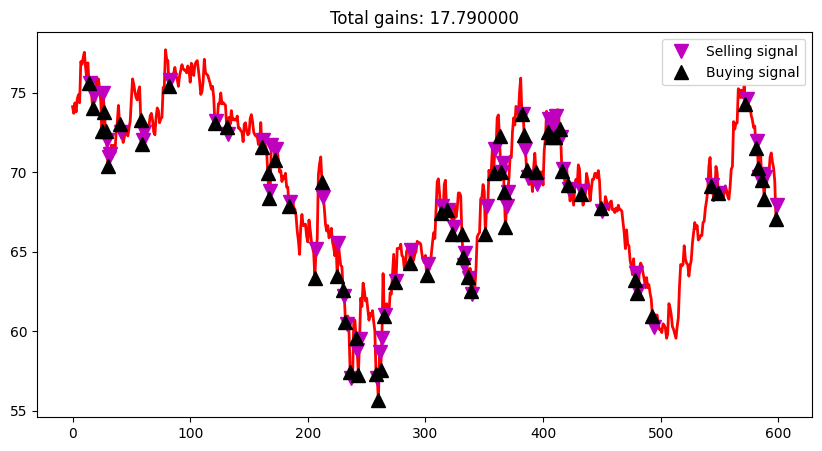

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.51
------------------------------------------


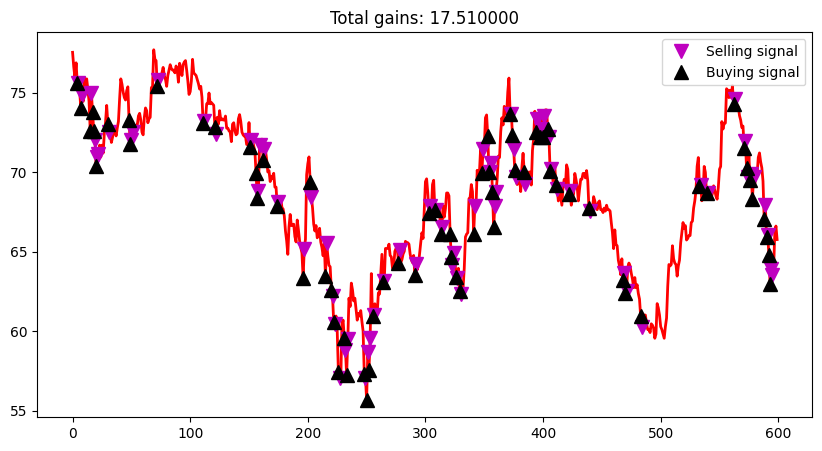

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $16.68
------------------------------------------


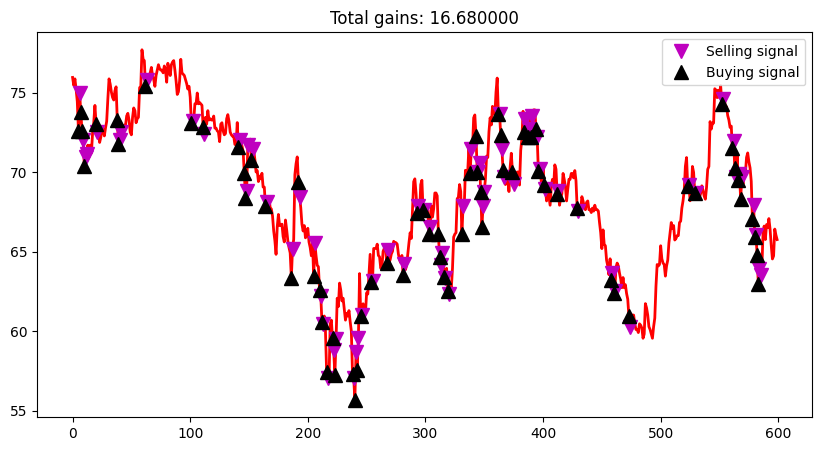

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.01
------------------------------------------


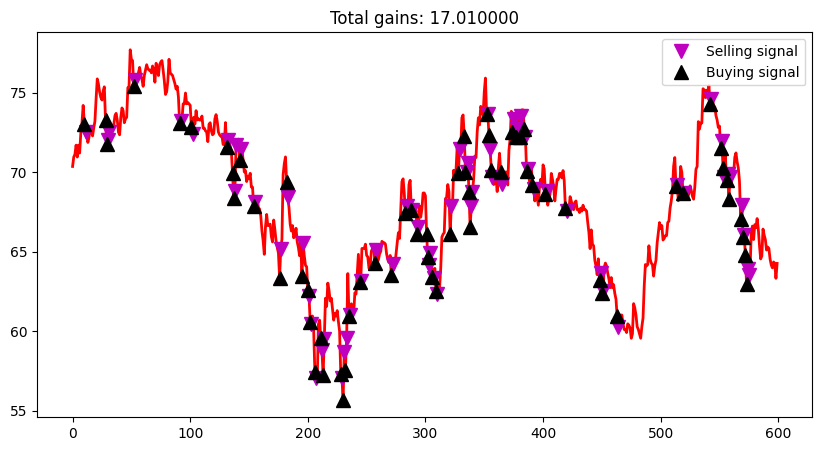

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.71
------------------------------------------


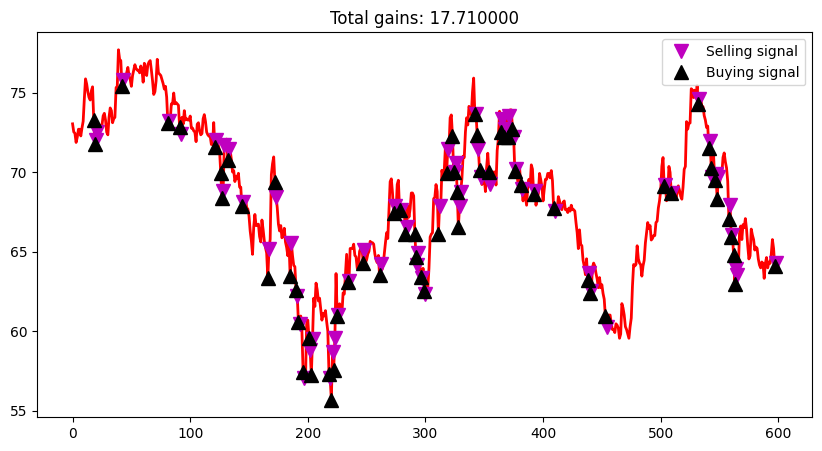

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.71
------------------------------------------


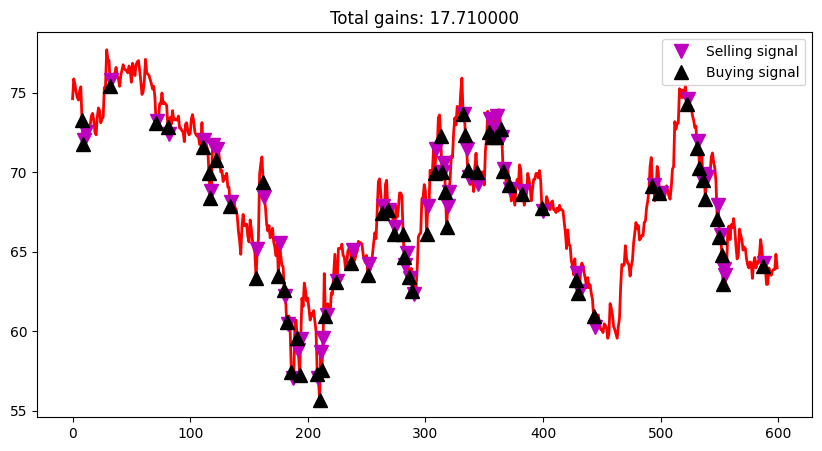

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.22
------------------------------------------


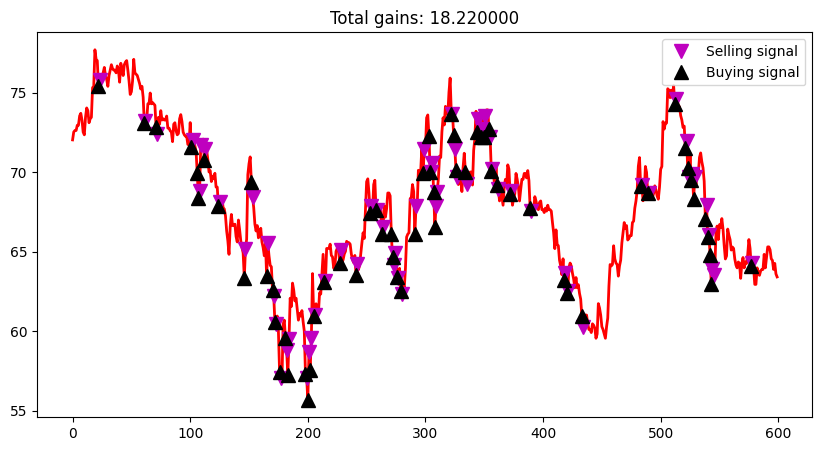

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.22
------------------------------------------


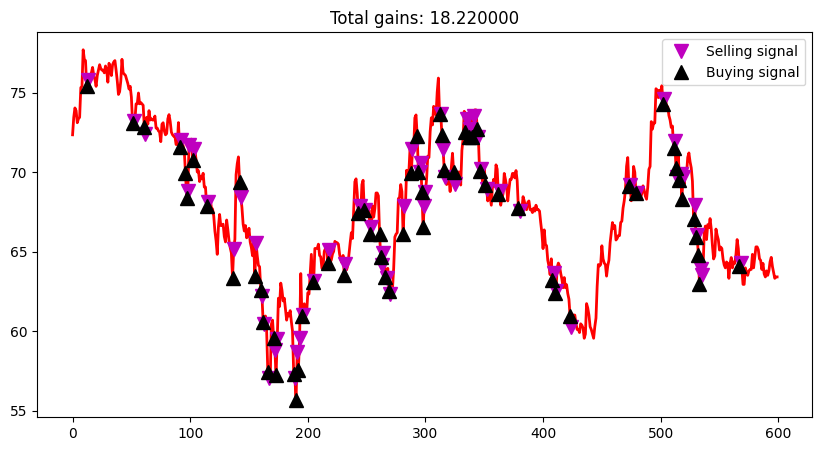

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.22
------------------------------------------


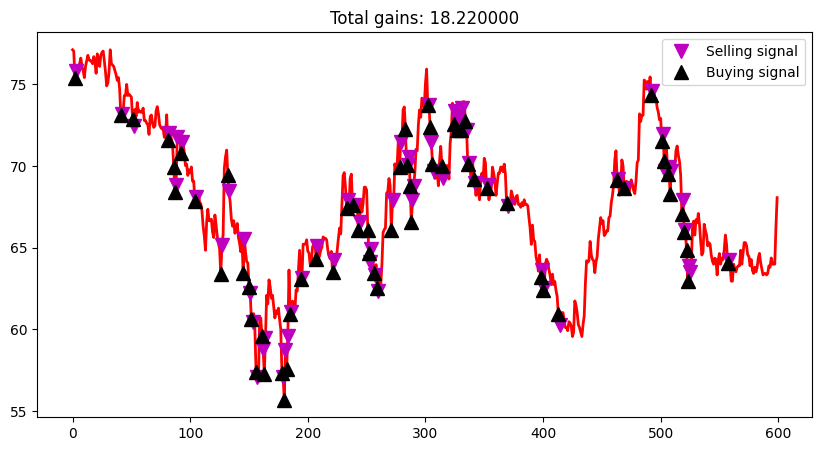

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.79
------------------------------------------


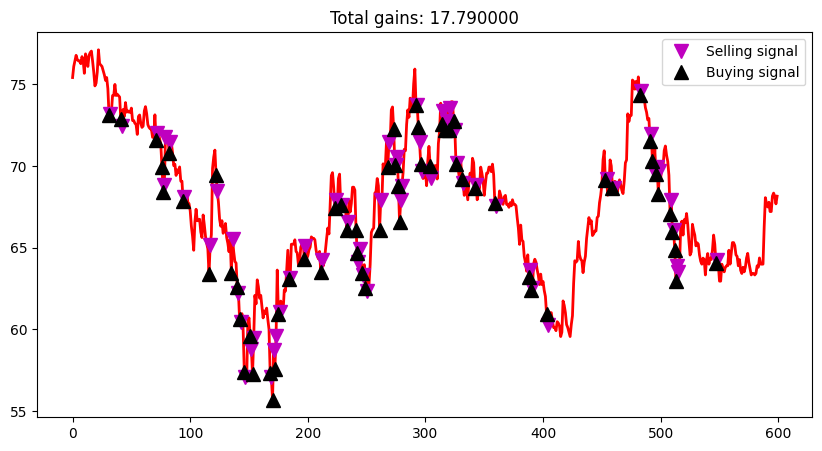

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.26
------------------------------------------


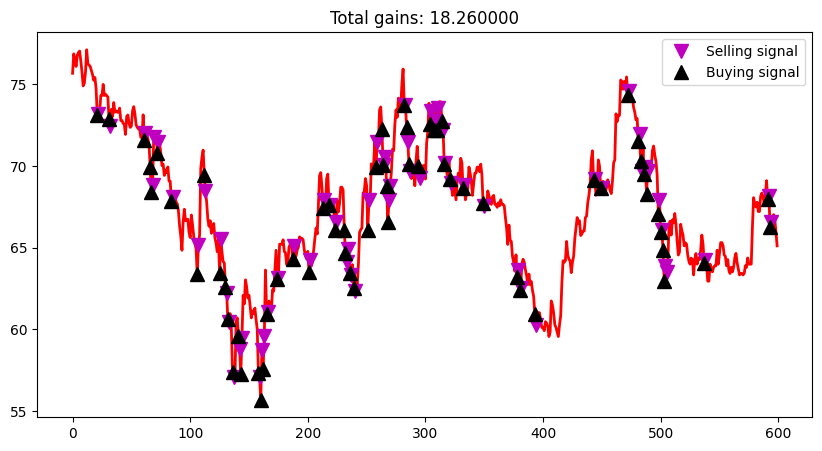

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.26
------------------------------------------


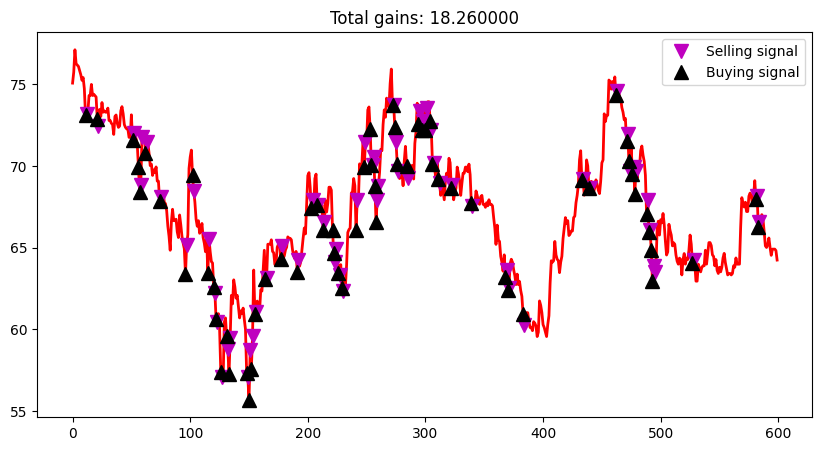

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.26
------------------------------------------


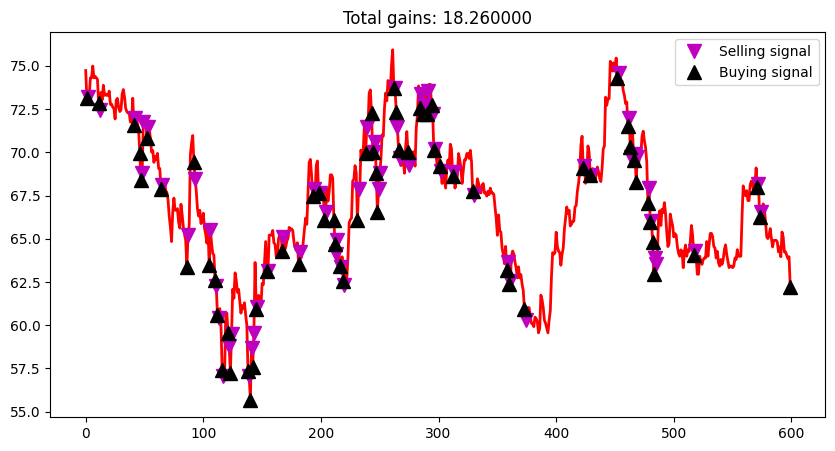

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.32
------------------------------------------


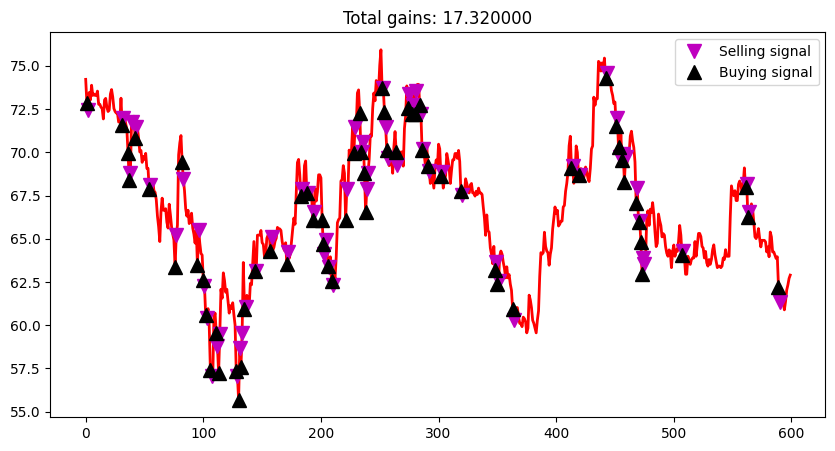

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.64
------------------------------------------


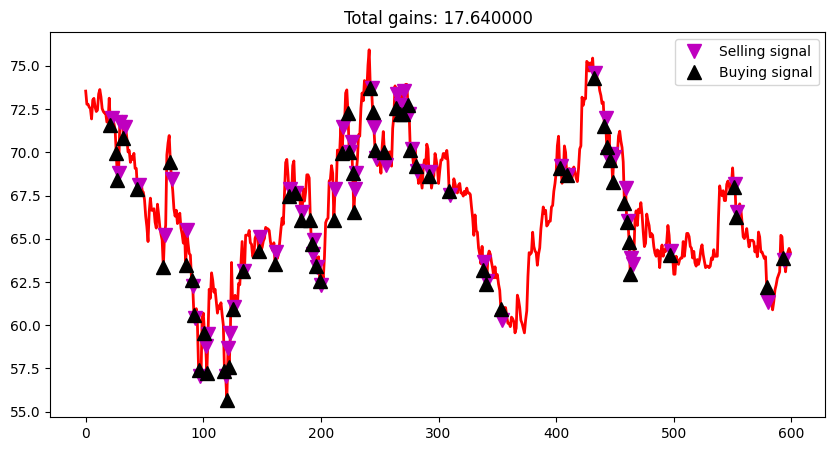

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.64
------------------------------------------


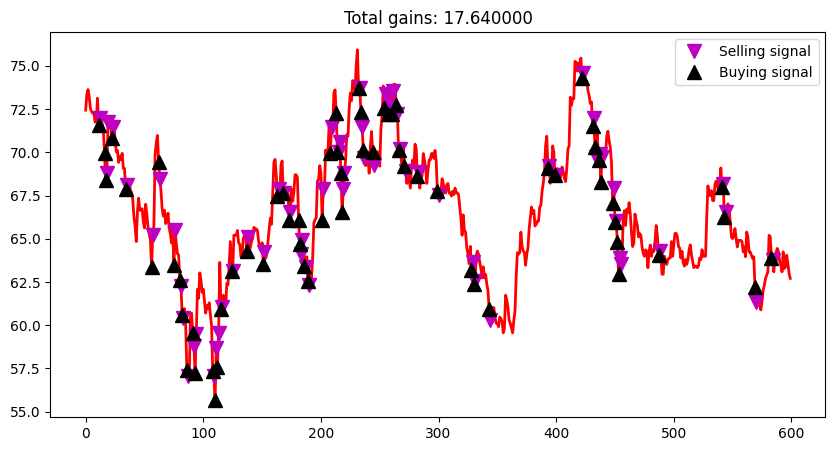

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.21
------------------------------------------


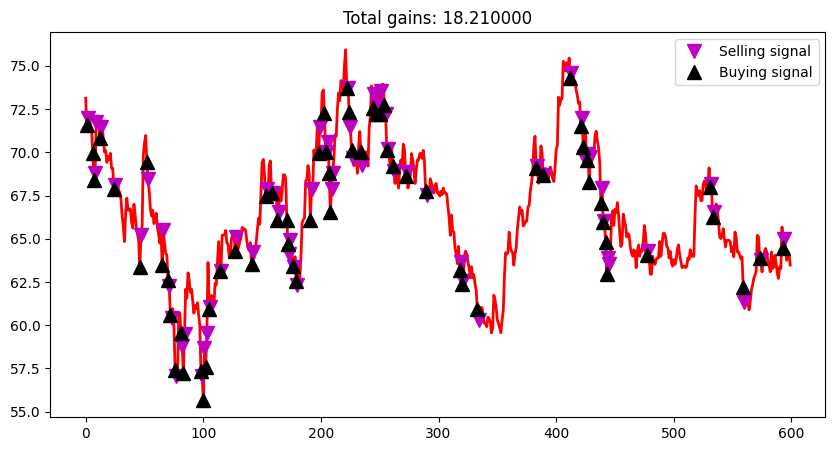

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $15.54
------------------------------------------


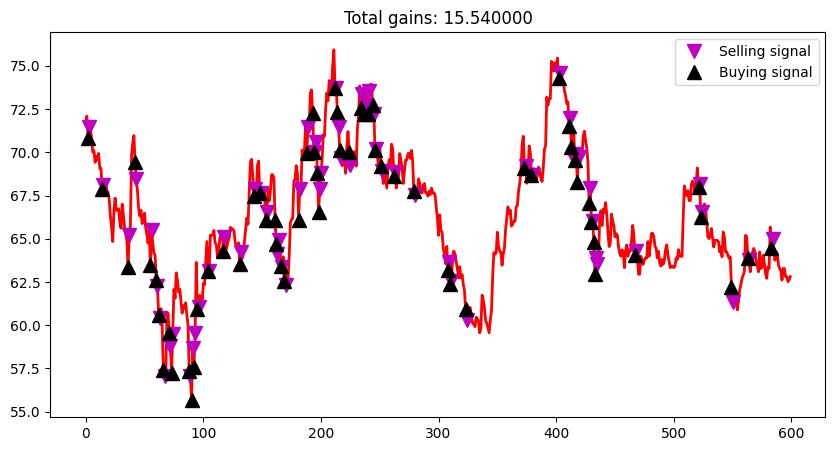

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $14.85
------------------------------------------


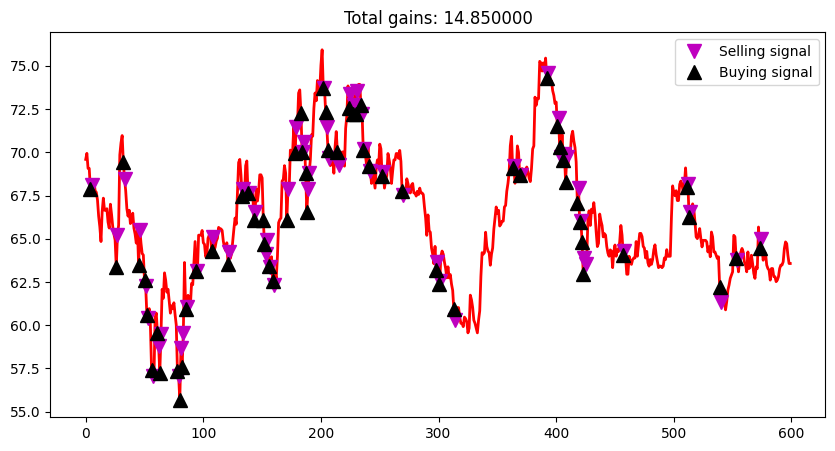

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $14.59
------------------------------------------


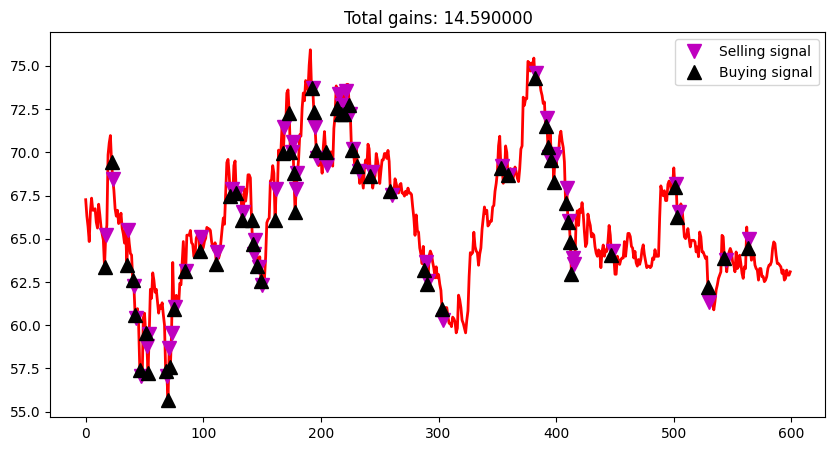

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.90
------------------------------------------


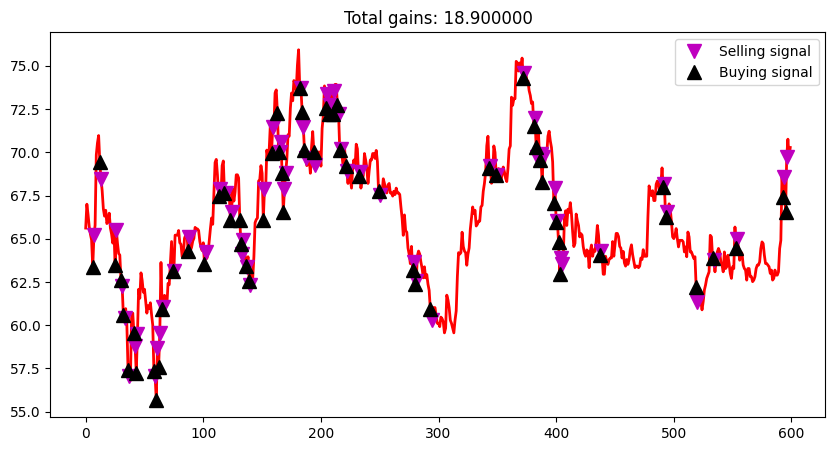

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $17.08
------------------------------------------


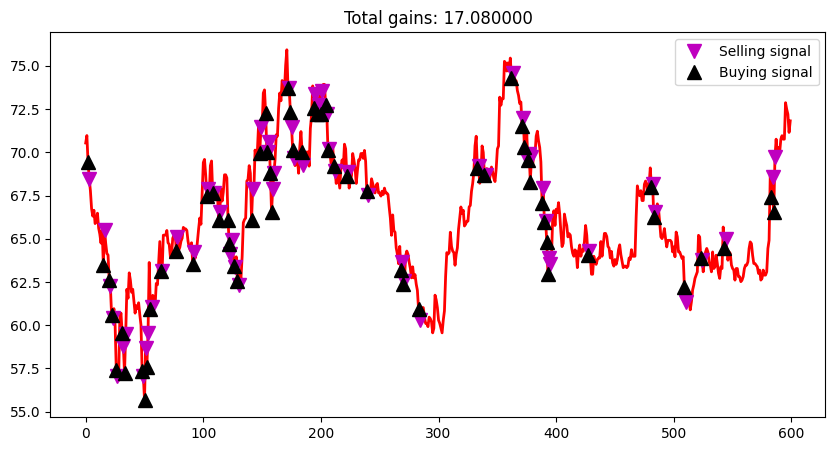

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $18.13
------------------------------------------


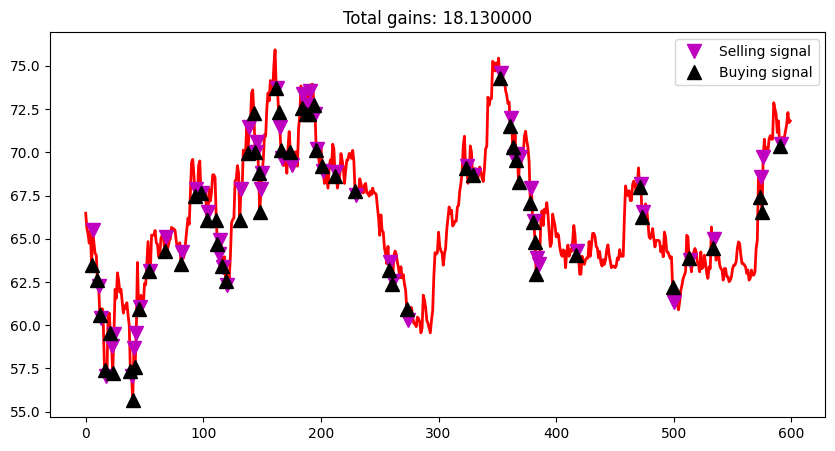

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $15.45
------------------------------------------


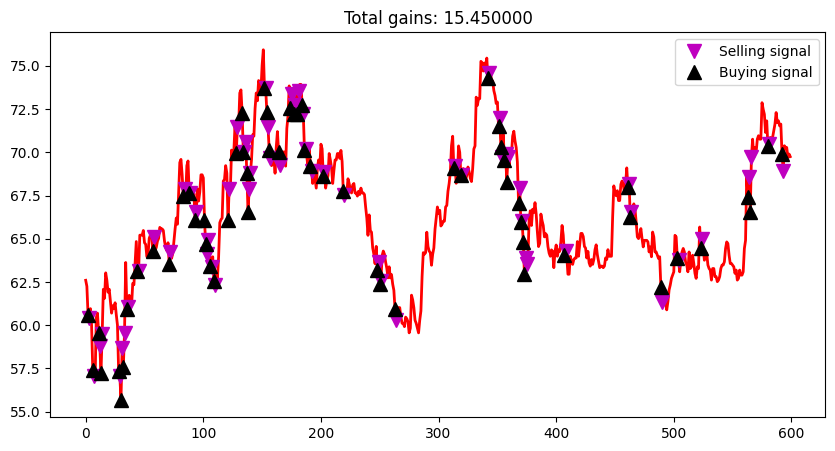

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $15.67
------------------------------------------


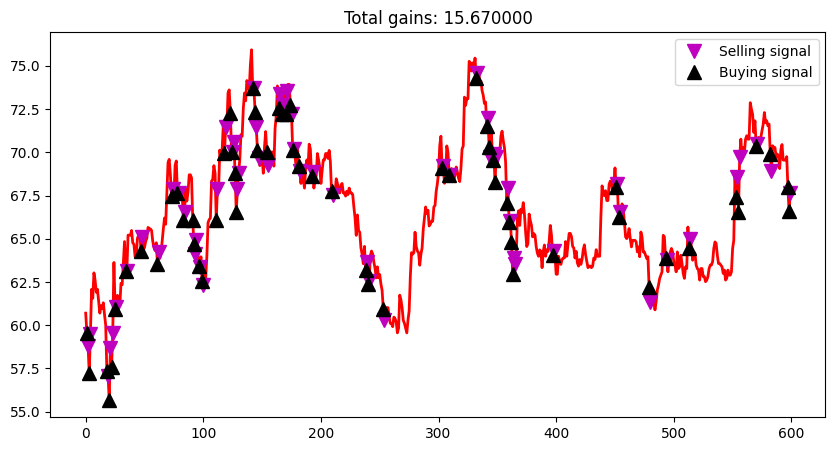

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $14.88
------------------------------------------


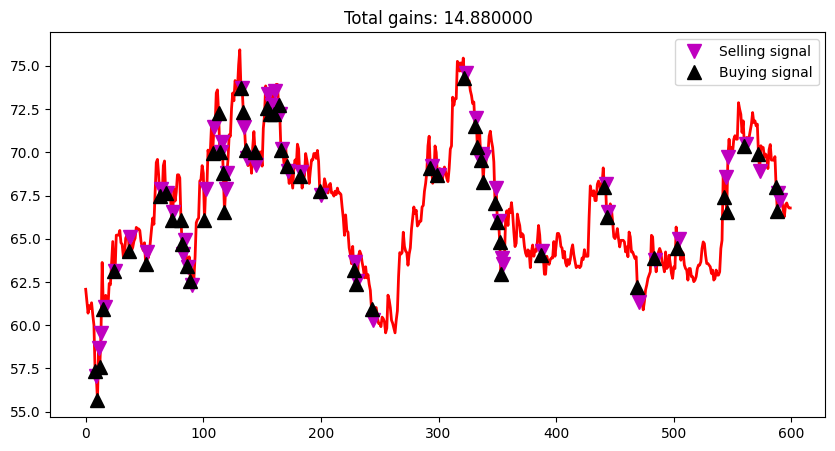

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $12.12
------------------------------------------


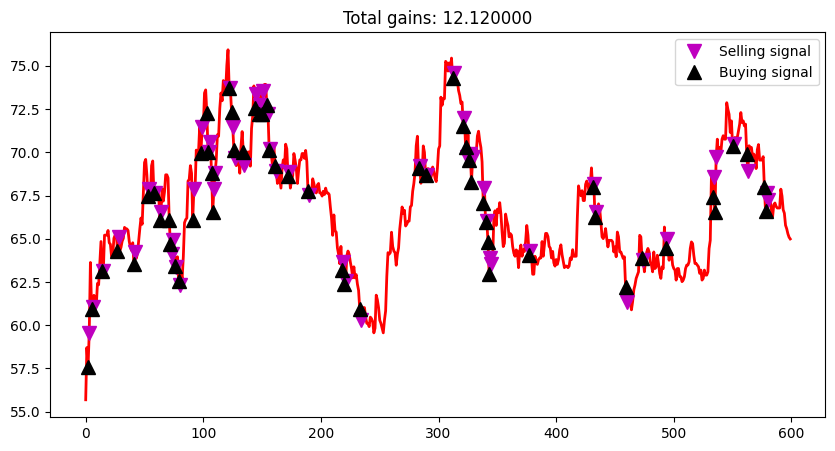

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $9.57
------------------------------------------


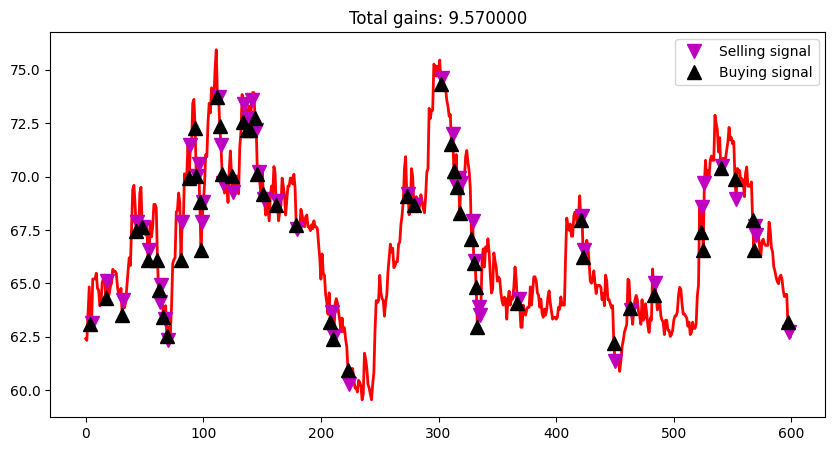

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $9.52
------------------------------------------


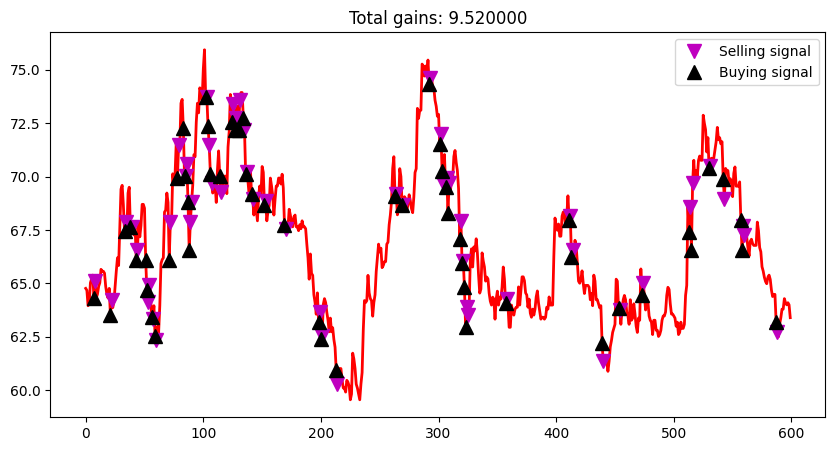

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $8.72
------------------------------------------


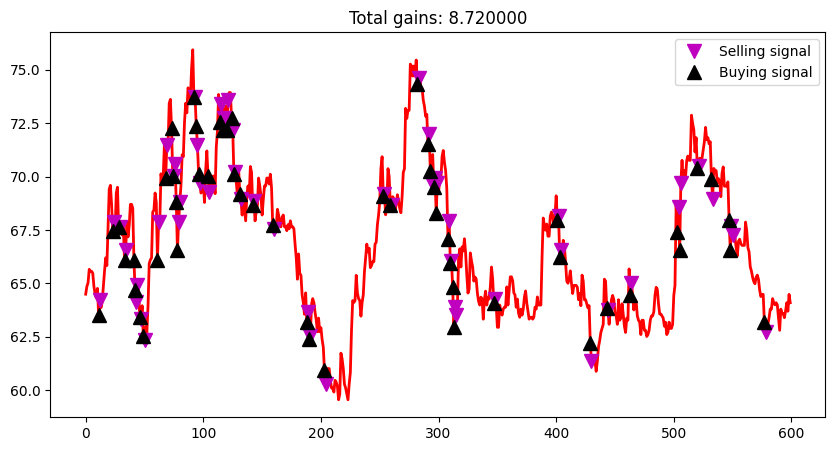

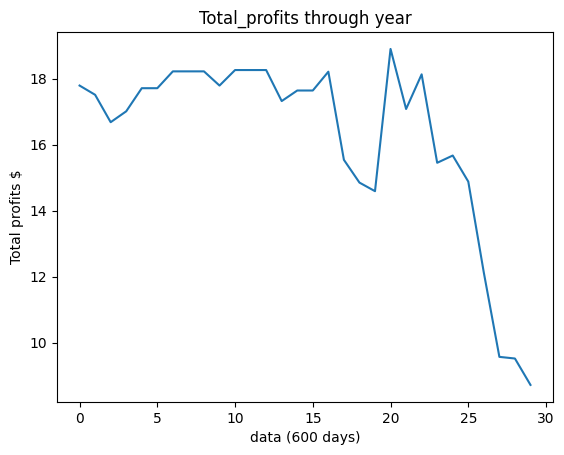

In [ ]:
total_profits = []

for data in X_test:
  env.test_model(data, "/content/model_ep0.keras")
  total_profits.append(env.total_profit)

plt.plot(total_profits)
plt.title('Total_profits through year')
plt.xlabel('data (600 days)')
plt.ylabel('Total profits $')
plt.show()


Ở đây, với dữ liệu được cách khoảng mỗi 10 ngày và càng xa dần với tập dữ liệu được huấn luyện ban đầu, ta thấy mô hình không còn giữ được tính ổn định của nó, một mặt có thể là do về bản chất, mô hình này cần được huấn luyện thường xuyên, liên tục và sẽ có hiệu quả khi càng gần với dữ liệu huấn luyện không lâu, nhưng thực tế, và có khả năng nhất là mô hình tuy cho ra các kết quả tương đối tích cực nhưng vẫn còn chưa đủ để khai phá hết những chiến lược cần học (do lượng data đổ vào việc huấn luyện còn ít).

Với dữ liệu này, mô hình đáng lẽ có thể học được nhiều hình mẫu hơn thế bằng cách thông qua việc tăng số hồi cho việc học (episode), tuy nhiên do các giới hạn về phần cứng nên ta sẽ xem ví dụ này là mẫu.

<a id='4.4.2'></a>
## 4.4.1 Đánh giá mô hình trên tập dữ liệu không cùng nguồn


In [ ]:
X=list(df_QNS["close"])
X=[float(x) for x in X]

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


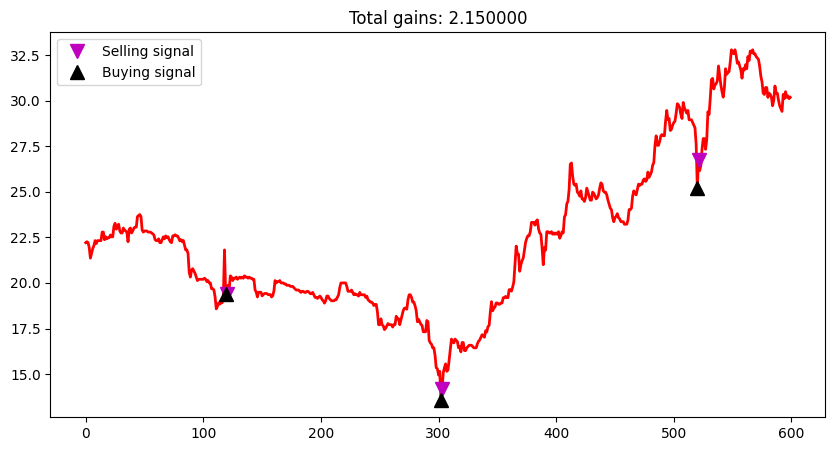

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


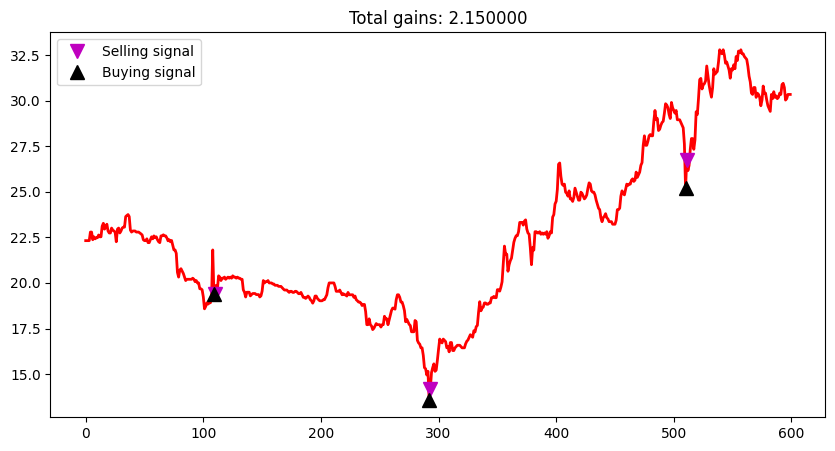

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


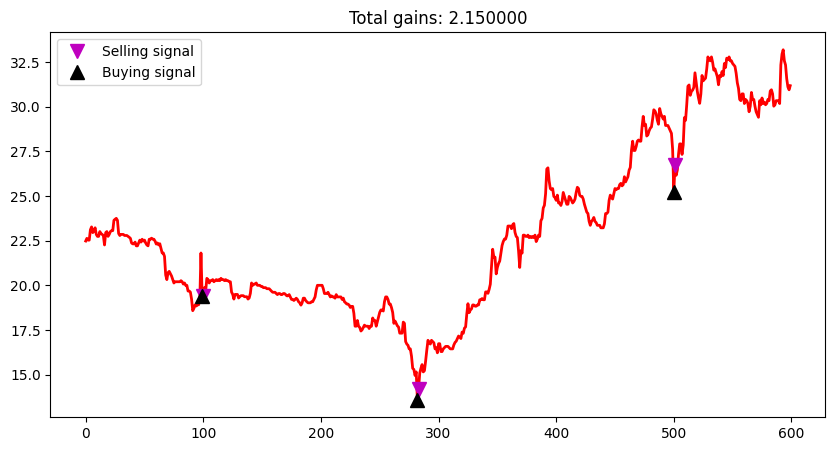

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


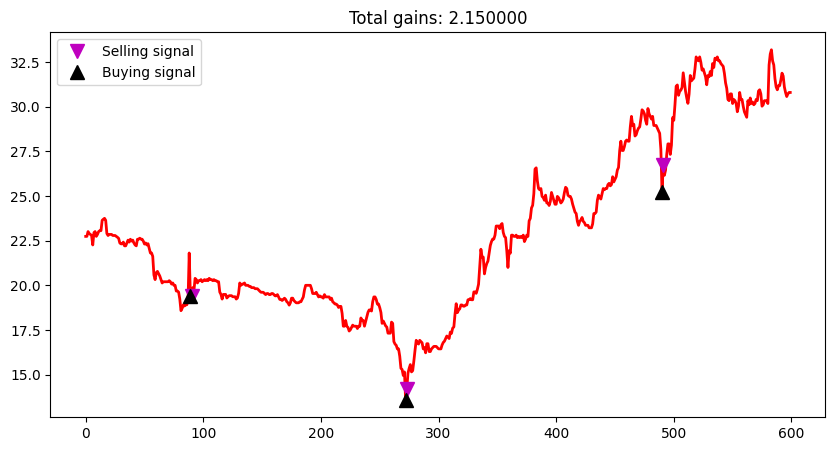

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


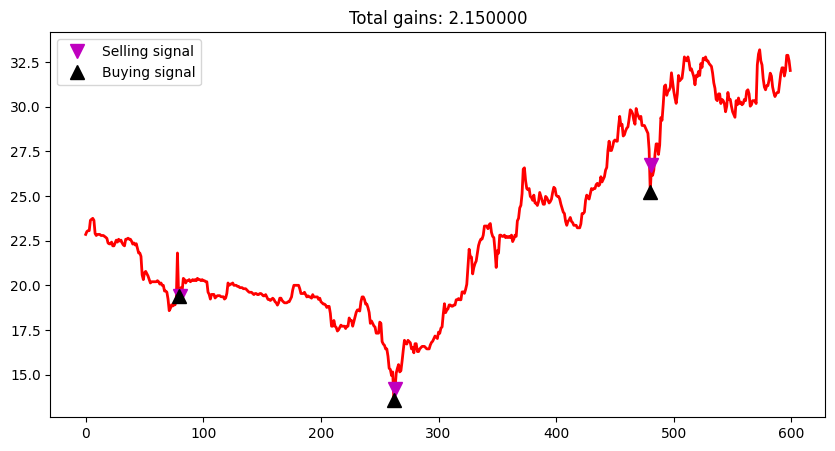

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.15
------------------------------------------


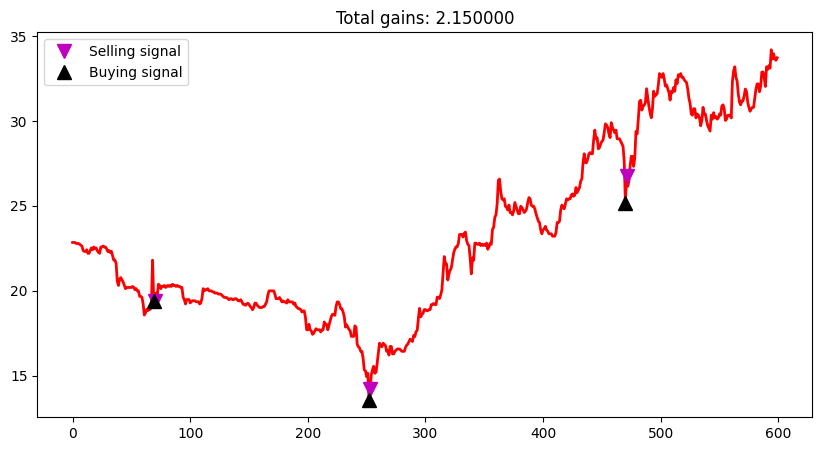

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.23
------------------------------------------


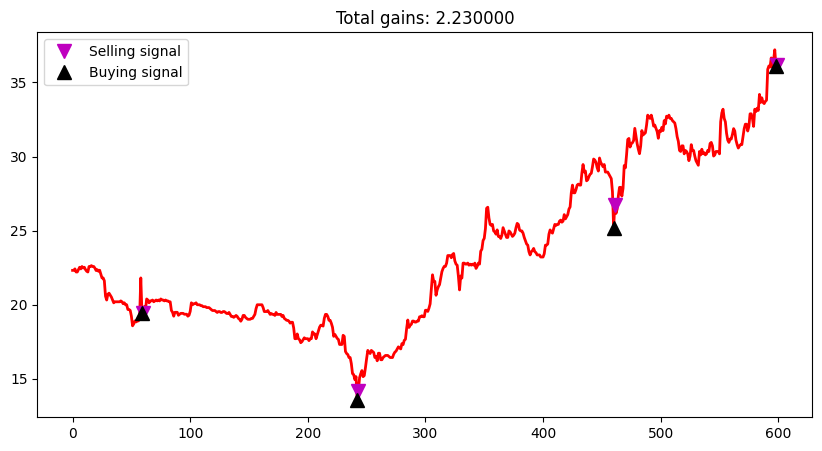

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.92
------------------------------------------


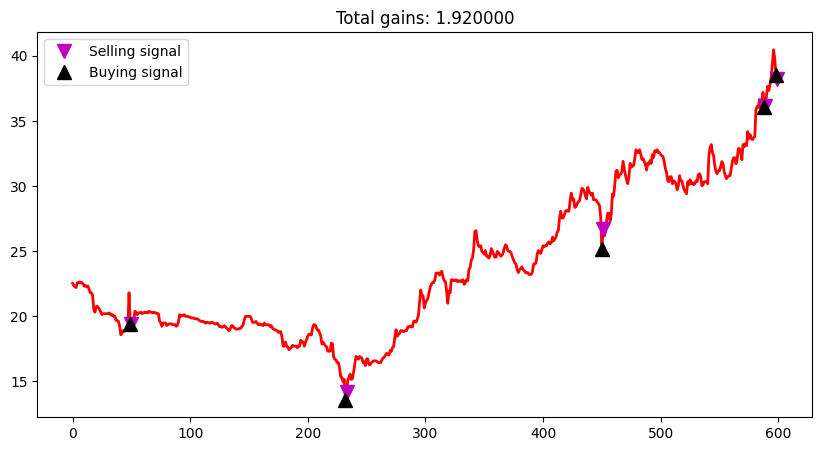

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.92
------------------------------------------


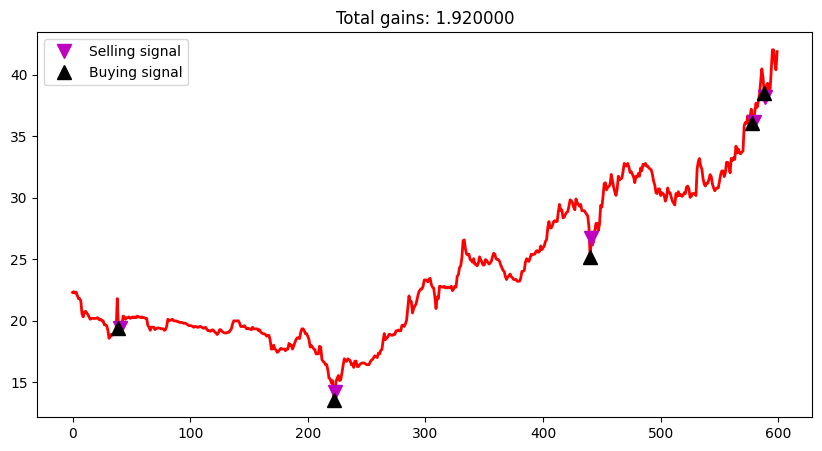

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.47
------------------------------------------


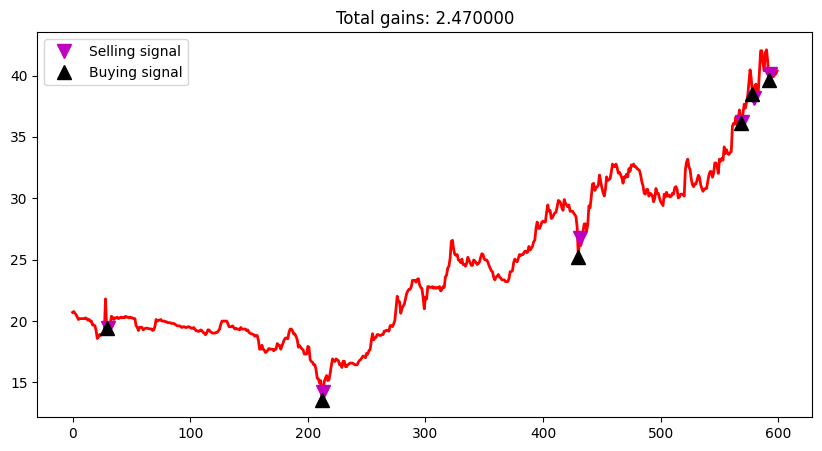

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.47
------------------------------------------


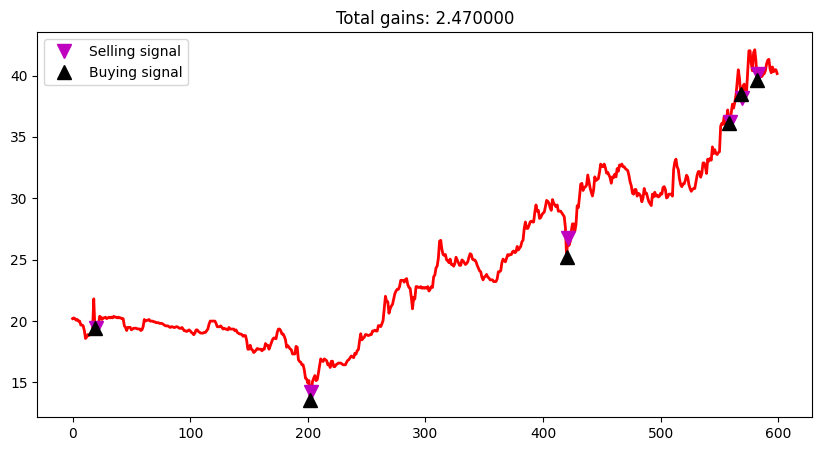

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.47
------------------------------------------


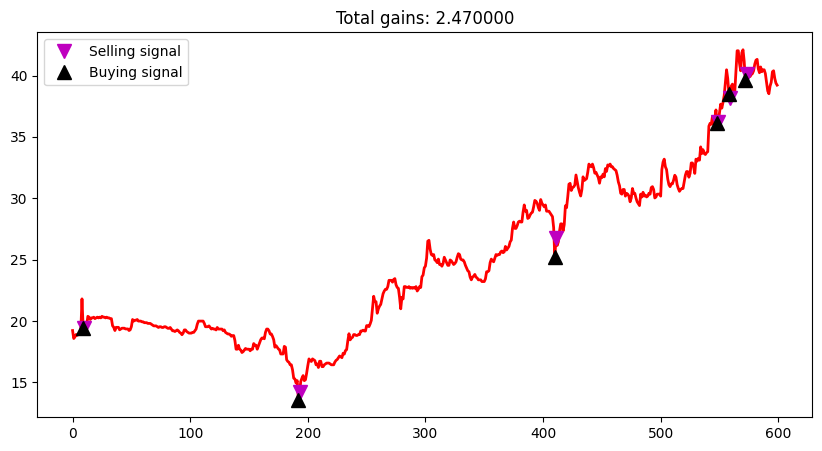

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.47
------------------------------------------


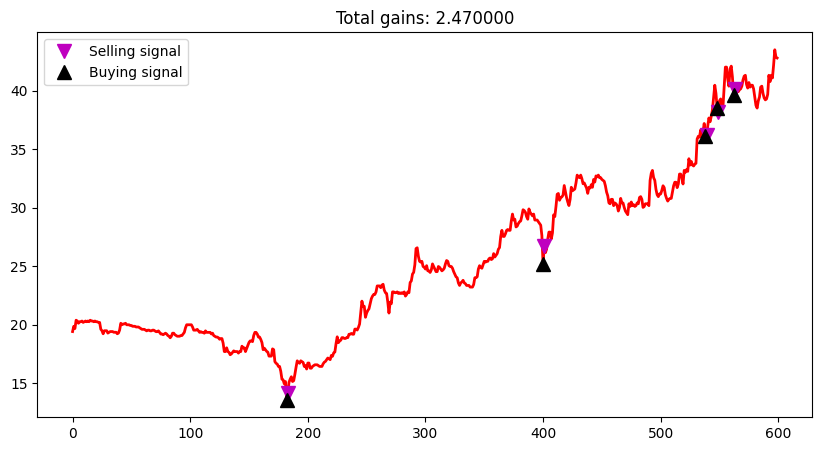

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $2.47
------------------------------------------


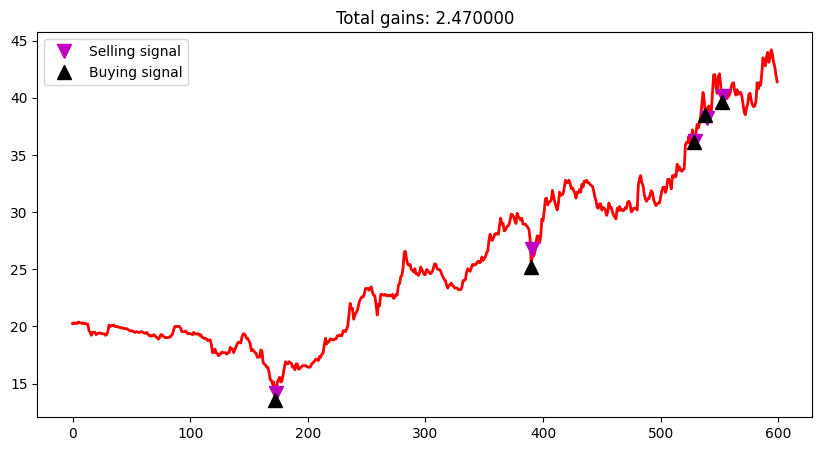

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


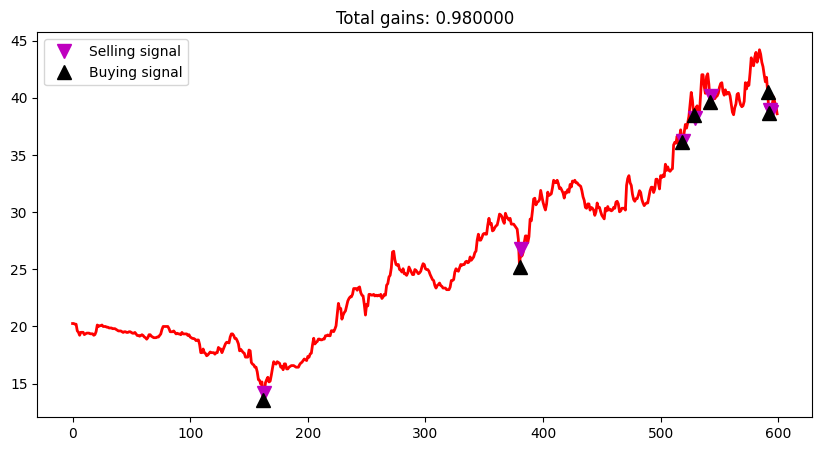

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


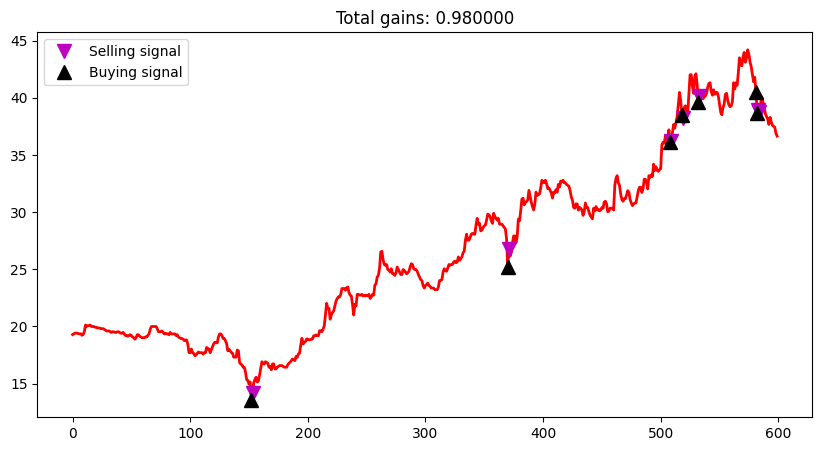

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


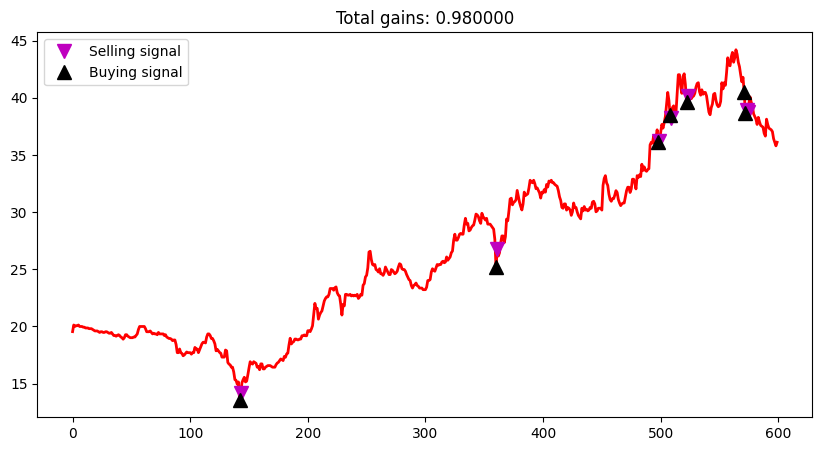

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


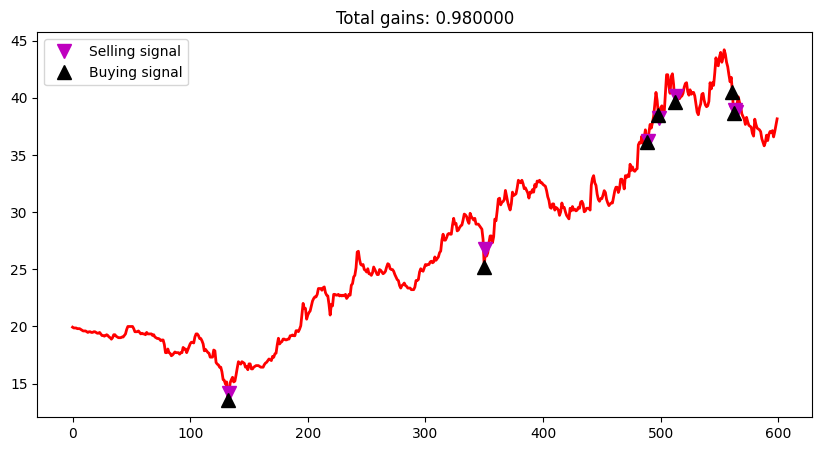

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


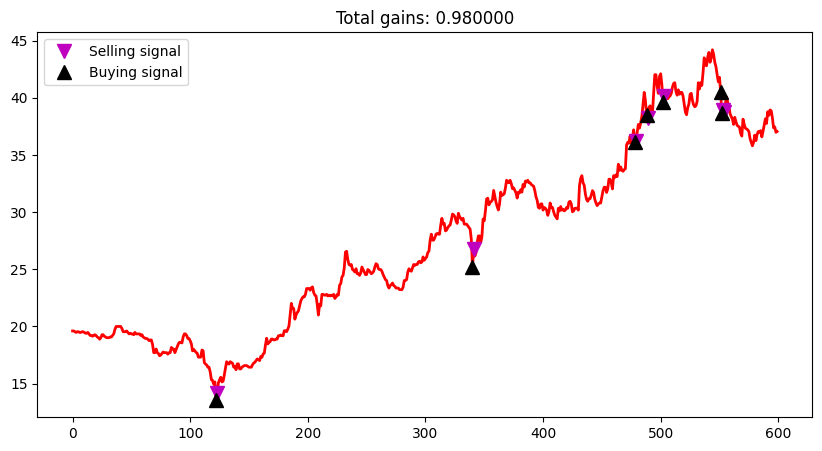

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


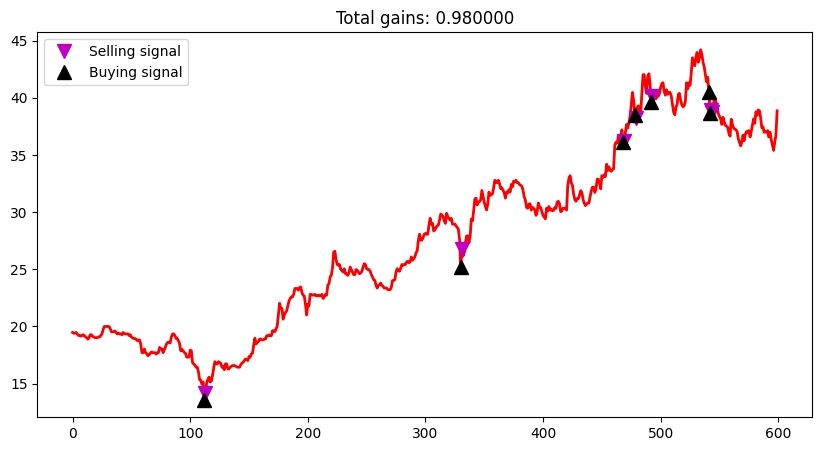

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


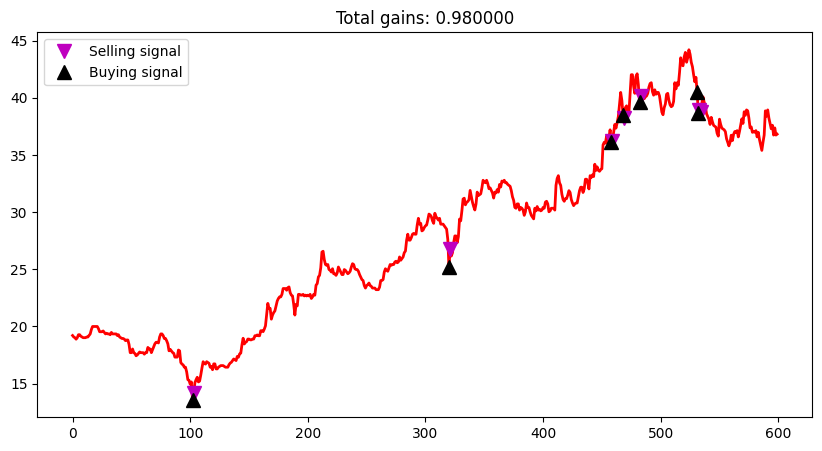

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


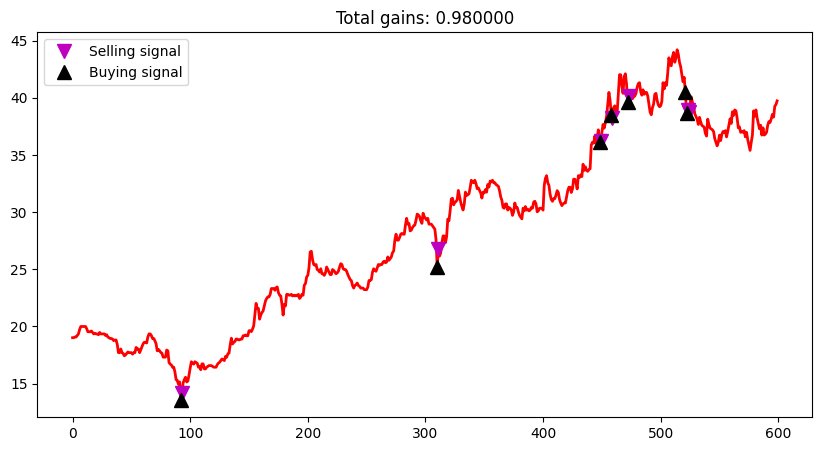

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $0.98
------------------------------------------


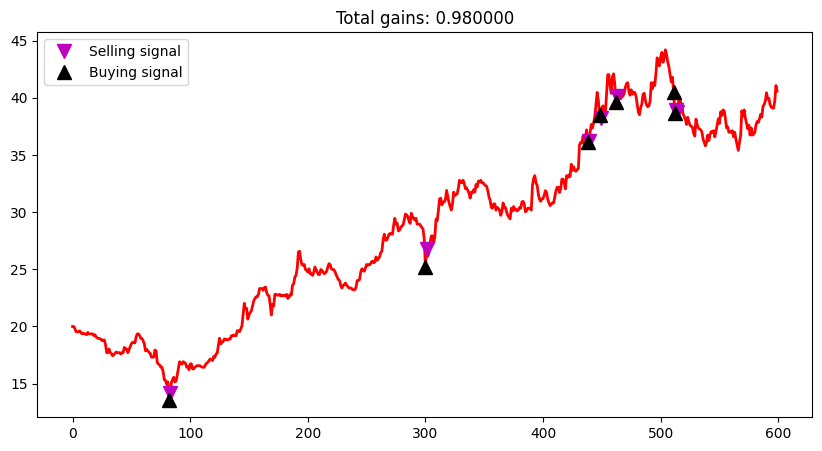

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.71
------------------------------------------


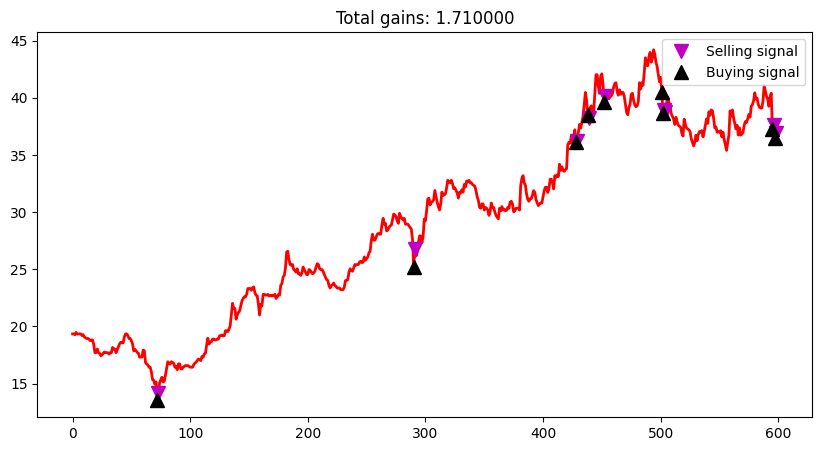

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.79
------------------------------------------


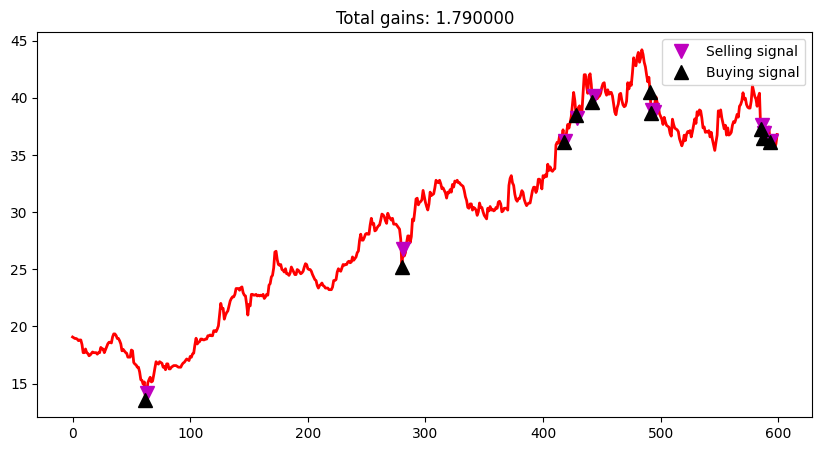

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.79
------------------------------------------


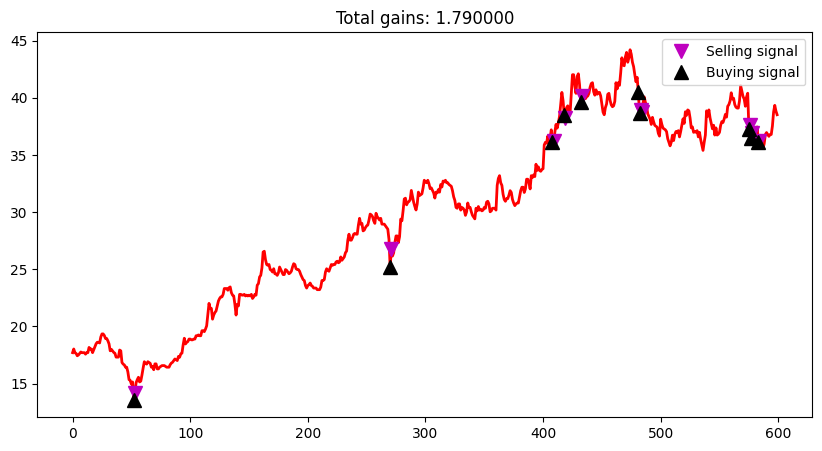

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.95
------------------------------------------


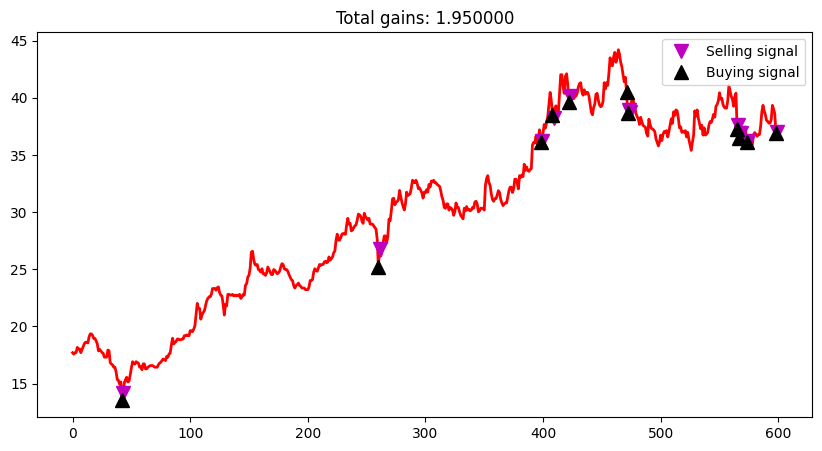

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.95
------------------------------------------


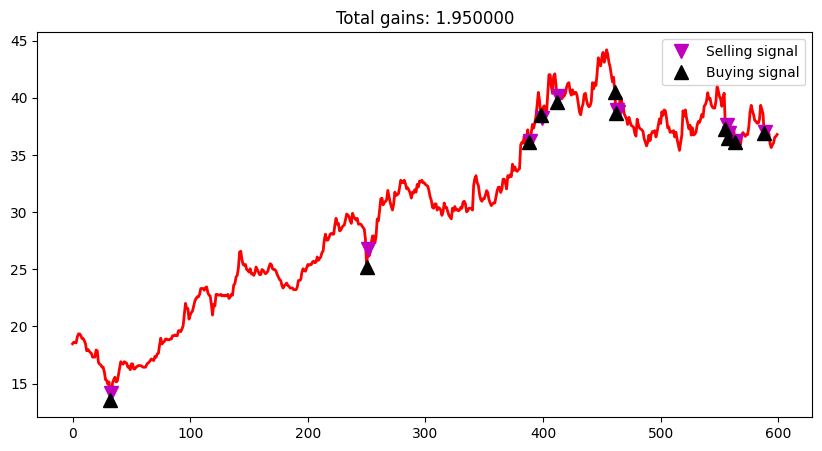

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.95
------------------------------------------


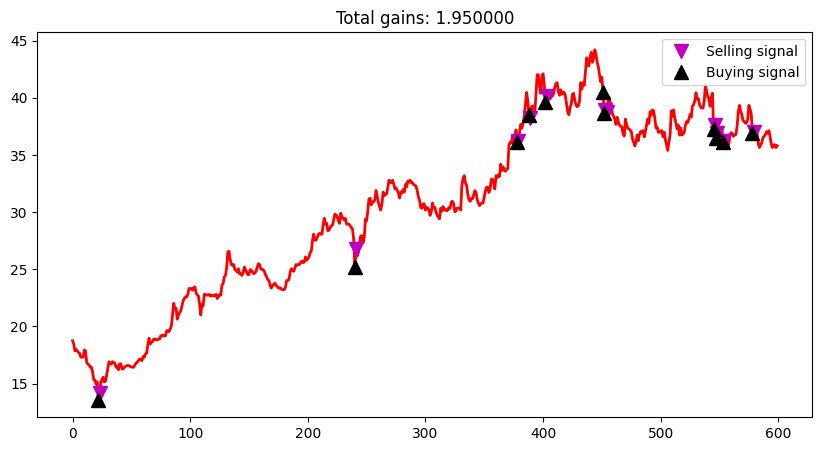

Tiến trình: [------------------->] 100%	 Ngày hiện tại: 600
------------------------------------------
Total Profit: $1.95
------------------------------------------


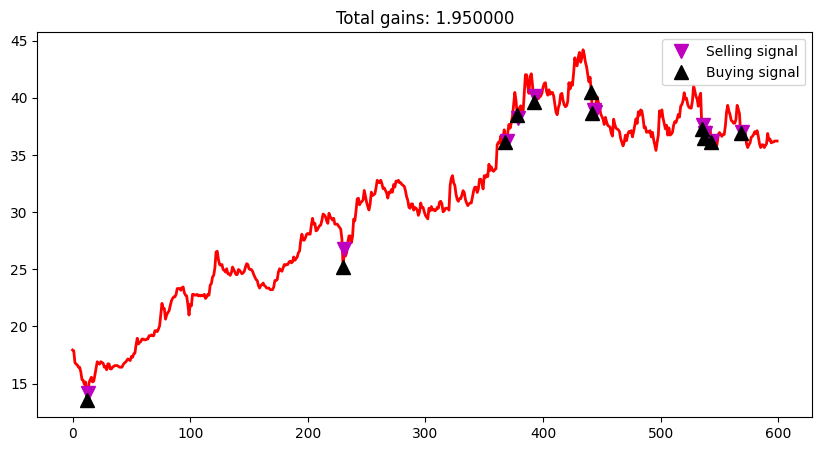

In [ ]:
X_test = []

for i in range(30):
  X_test.append(X[0+10*i: 600 +10*i ])

total_profits = []

for data in X_test:
  env.test_model(data, "model_ep0.keras")
  total_profits.append(env.total_profit)


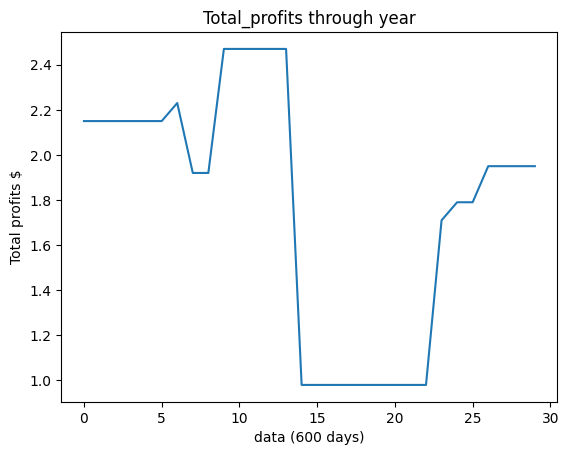

In [ ]:
plt.plot(total_profits)
plt.title('Total_profits through year')
plt.xlabel('data (600 days)')
plt.ylabel('Total profits $')
plt.show()

Một mặt khác, đối với các dữ liệu chứng khoán khác mã được huấn luyện, mô hình vẫn còn yếu kém trong việc nắm bắt các mẫu hình thông tin cho nên vẫn chưa thế thể hiện được hiệu quả trong việc trading.

<a id='5.'></a>
# 5. Kết luận

Trong khuôn khổ của Đồ án này, ta đã dựng được một mô hình giao dịch chứng khoán dựa trên dữ liệu cung cấp từ API, và đồng thời ta cũng thấy được cách mà mô hình tương tác với môi trường thông qua các giao dịch mua bán hoặc giữ từ đó nhận về một trạng thái tương ứng và dần dần học tập qua các lần như vậy.

Trên lý thuyết về Q-learning kết hợp với Deep Neural Network ở mức đô cơ bản, ta thấy được mô hình đã tự động học và đưa ra các chiến lược phức tạp mà không cần dùng tới cơ chế bảng để lưu và đánh giá các trạng thái và Q-value của chúng. Đồng thời đi theo đó là hai kỹ thuật Greedy-epsilon và Experience-replay để mô hình vẫn giữ được tính ổn định của nó.

Tuy vậy, từ trong lý thuyết kết hợp với quá trình chạy thực nghiệm tính toán, mô hình đã bộc lộ rõ những khuyết điểm về thời gian tính toán (do phải học lại liên tục các trạng thái từ trước đó lặp đi lặp lại để đổi được sự ổn định của mô hình), và tính kém ổn định trong khi dữ liệu chứng khoán thay đổi một cách đột ngột. Đây rõ thực là những mặt hạn chế mà mô hình này đang mang theo, và từ đây cũng có thể là một tiến đề để phát triển các mô hình học tăng cường về sau.

Tổng kết lại, với mô hình học tăng cường Deep Q Learning này đã cho ta thấy được một góc nhìn về việc đút kết các chiến lược trong giao dịch chứng khoán - vốn là một lĩnh vực cần rất nhiều sự am hiểu sâu về lĩnh vực, đồng thời vẫn có thể là một khởi đầu để tìm hiểu thêm về các thuật toán bổ trợ việc giao dịch chứng khoán sau này.